In [1]:
import glob
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

%load_ext lab_black

In [3]:
import pycisTopic
import glob
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import multiprocess as mp
from multiprocess import Pool
import pprint as pp

In [4]:
from general_definitions import *

# General QC plots

In [5]:
metadata_bc_pkl_path_dict = {
    x.split("/")[-1].split(f"__")[0]: x
    for x in sorted(
        glob.glob("../fixedcells_2_cistopic/cistopic_qc_out/*FIXEDCELLS*metadata*.pkl")
    )
}
metadata_bc_pkl_path_dict

for sample in [
    "VIB_hydrop_11.FIXEDCELLS",
    "VIB_hydrop_12.FIXEDCELLS",
    "VIB_hydrop_21.FIXEDCELLS",
    "VIB_hydrop_22.FIXEDCELLS",
]:
    metadata_bc_pkl_path_dict.pop(sample)

metadata_bc_pkl_path_dict

{'BIO_ddseq_1.FIXEDCELLS': '../fixedcells_2_cistopic/cistopic_qc_out/BIO_ddseq_1.FIXEDCELLS__metadata_bc.pkl',
 'BIO_ddseq_2.FIXEDCELLS': '../fixedcells_2_cistopic/cistopic_qc_out/BIO_ddseq_2.FIXEDCELLS__metadata_bc.pkl',
 'BIO_ddseq_3.FIXEDCELLS': '../fixedcells_2_cistopic/cistopic_qc_out/BIO_ddseq_3.FIXEDCELLS__metadata_bc.pkl',
 'BIO_ddseq_4.FIXEDCELLS': '../fixedcells_2_cistopic/cistopic_qc_out/BIO_ddseq_4.FIXEDCELLS__metadata_bc.pkl',
 'BRO_mtscatac_1.FIXEDCELLS': '../fixedcells_2_cistopic/cistopic_qc_out/BRO_mtscatac_1.FIXEDCELLS__metadata_bc.pkl',
 'BRO_mtscatac_2.FIXEDCELLS': '../fixedcells_2_cistopic/cistopic_qc_out/BRO_mtscatac_2.FIXEDCELLS__metadata_bc.pkl',
 'CNA_10xmultiome_1.FIXEDCELLS': '../fixedcells_2_cistopic/cistopic_qc_out/CNA_10xmultiome_1.FIXEDCELLS__metadata_bc.pkl',
 'CNA_10xmultiome_2.FIXEDCELLS': '../fixedcells_2_cistopic/cistopic_qc_out/CNA_10xmultiome_2.FIXEDCELLS__metadata_bc.pkl',
 'CNA_10xv11_1.FIXEDCELLS': '../fixedcells_2_cistopic/cistopic_qc_out/CNA_10

In [6]:
df = pd.DataFrame(index=metadata_bc_pkl_path_dict.keys())
df["tech"] = [x.split("_")[1] for x in df.index]
techs = sorted(df["tech"].unique())
techs

['10xmultiome',
 '10xv1',
 '10xv11',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 's3atac']

In [7]:
selected_bc_path_dict = {
    x.split("/")[-1].split(f"_bc")[0]: x
    for x in sorted(
        glob.glob("../fixedcells_2_cistopic/selected_barcodes/*FIXEDCELLS*.pkl")
    )
}
selected_bc_path_dict

for sample in [
    "VIB_hydrop_11.FIXEDCELLS",
    "VIB_hydrop_12.FIXEDCELLS",
    "VIB_hydrop_21.FIXEDCELLS",
    "VIB_hydrop_22.FIXEDCELLS",
]:
    selected_bc_path_dict.pop(sample)

selected_bc_path_dict

metadata_bc_df_merged = pd.DataFrame()
metadata_bc_df_filtered_merged = pd.DataFrame()

for tech in techs:
    print(tech)
    samples = list(df[df["tech"] == tech].index)

    for sample in samples:
        metadata_path = metadata_bc_pkl_path_dict[sample]

        with open(metadata_path, "rb") as fh:
            metadata_bc_df = pickle.load(fh)

        metadata_bc_df["tech"] = sample.split("_")[1]

        with open(selected_bc_path_dict[sample], "rb") as fh:
            selected_bc = pickle.load(fh)

        selected_bc = [x.replace("FULL", "FIXEDCELLS") for x in selected_bc]

        metadata_bc_df_filtered = metadata_bc_df.loc[selected_bc]

        metadata_bc_df_merged = pd.concat([metadata_bc_df_merged, metadata_bc_df])
        metadata_bc_df_filtered_merged = pd.concat(
            [metadata_bc_df_filtered_merged, metadata_bc_df_filtered]
        )

metadata_bc_df_filtered_merged["Log_unique_nr_frag_in_regions"] = np.log10(
    metadata_bc_df_filtered_merged["Unique_nr_frag_in_regions"]
)

metadata_bc_df_filtered_merged["tech_sample_id"] = (
    metadata_bc_df_filtered_merged["tech"]
    + "_"
    + metadata_bc_df_filtered_merged["sample_id"]
)

metadata_bc_df_filtered_merged["run"] = [
    x.split(".")[0][-1] for x in metadata_bc_df_filtered_merged["sample_id"]
]

metadata_bc_df_filtered_merged["replicate"] = [
    x.split(".")[0][-1] for x in metadata_bc_df_filtered_merged["sample_id"]
]

10xmultiome
10xv1
10xv11
10xv2
ddseq
hydrop
mtscatac
s3atac


In [8]:
sample_id_ultrashort_alias_dict_anon = {
    "BIO_ddseq_1.FIXEDCELLS": "ddS Bi1",
    "BIO_ddseq_2.FIXEDCELLS": "ddS Bi2",
    "BIO_ddseq_3.FIXEDCELLS": "ddS Bi3",
    "BIO_ddseq_4.FIXEDCELLS": "ddS Bi4",
    "BRO_mtscatacfacs_1.FIXEDCELLS": "mt* Br1",
    "BRO_mtscatacfacs_2.FIXEDCELLS": "mt* Br2",
    "CNA_10xmultiome_1.FIXEDCELLS": "MO C1",
    "CNA_10xmultiome_2.FIXEDCELLS": "MO C2",
    "CNA_10xv11_1.FIXEDCELLS": "v1.1 C1",
    "CNA_10xv11_2.FIXEDCELLS": "v1.1 C2",
    "CNA_10xv11_3.FIXEDCELLS": "v1.1 C3",
    "CNA_10xv11c_1.FIXEDCELLS": "v1.1c C1",
    "CNA_10xv11c_2.FIXEDCELLS": "v1.1c C2",
    "CNA_10xv2_1.FIXEDCELLS": "v2 C1",
    "CNA_10xv2_2.FIXEDCELLS": "v2 C2",
    "CNA_hydrop_1.FIXEDCELLS": "Hy C1",
    "CNA_hydrop_2.FIXEDCELLS": "Hy C2",
    "CNA_hydrop_3.FIXEDCELLS": "Hy C3",
    "CNA_mtscatac_1.FIXEDCELLS": "mt C1",
    "CNA_mtscatac_2.FIXEDCELLS": "mt C2",
    "EPF_hydrop_1.FIXEDCELLS": "Hy E1",
    "EPF_hydrop_2.FIXEDCELLS": "Hy E2",
    "EPF_hydrop_3.FIXEDCELLS": "Hy E3",
    "EPF_hydrop_4.FIXEDCELLS": "Hy E4",
    "HAR_ddseq_1.FIXEDCELLS": "ddS H1",
    "HAR_ddseq_2.FIXEDCELLS": "ddS H2",
    "MDC_mtscatac_1.FIXEDCELLS": "mt M1",
    "MDC_mtscatac_2.FIXEDCELLS": "mt M2",
    "OHS_s3atac_1.FIXEDCELLS": "s3 O1",
    "OHS_s3atac_2.FIXEDCELLS": "s3 O2",
    "SAN_10xmultiome_1.FIXEDCELLS": "MO Sa1",
    "SAN_10xmultiome_2.FIXEDCELLS": "MO Sa2",
    "STA_10xv11_1.FIXEDCELLS": "v1.1 St1",
    "STA_10xv11_2.FIXEDCELLS": "v1.1 St2",
    "TXG_10xv11_1.FIXEDCELLS": "v1.1 T1",
    "TXG_10xv2_1.FIXEDCELLS": "v2 T1",
    "TXG_10xv2_2.FIXEDCELLS": "v2 T2",
    "UCS_ddseq_1.FIXEDCELLS": "ddS U1",
    "UCS_ddseq_2.FIXEDCELLS": "ddS U2",
    "VIB_10xmultiome_1.FIXEDCELLS": "MO V1",
    "VIB_10xmultiome_2.FIXEDCELLS": "MO V2",
    "VIB_10xv1_1.FIXEDCELLS": "v1 V1",
    "VIB_10xv1_2.FIXEDCELLS": "v1 V2",
    "VIB_10xv2_1.FIXEDCELLS": "v2 V1",
    "VIB_10xv2_2.FIXEDCELLS": "v2 V2",
    "VIB_hydrop_1.FIXEDCELLS": "Hy V1",
    "VIB_hydrop_2.FIXEDCELLS": "Hy V2",
    "VIB_hydrop_11.FIXEDCELLS": "Hy V1",
    "VIB_hydrop_12.FIXEDCELLS": "Hy V1",
    "VIB_hydrop_21.FIXEDCELLS": "Hy V2",
    "VIB_hydrop_22.FIXEDCELLS": "Hy V2",
}

In [9]:
metadata_bc_df_filtered_merged

,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,FRIP,TSS_enrichment,sample_id,tech,Log_unique_nr_frag_in_regions,tech_sample_id,run,replicate
TAGGTTTCTGTAATAG___CNA_10xmultiome_1.FIXEDCELLS,4.030316,3.745153,10723,5561,5162,0.481395,7438,3893,0.700054,30.260402,CNA_10xmultiome_1.FIXEDCELLS,10xmultiome,3.590284,10xmultiome_CNA_10xmultiome_1.FIXEDCELLS,1,1
AAGCCTAACTTAAAGC___CNA_10xmultiome_1.FIXEDCELLS,4.418798,4.152594,26230,14210,12020,0.458254,21844,11805,0.830753,33.009646,CNA_10xmultiome_1.FIXEDCELLS,10xmultiome,4.072066,10xmultiome_CNA_10xmultiome_1.FIXEDCELLS,1,1
ACTAAGACTACTAGTC___CNA_10xmultiome_1.FIXEDCELLS,4.450619,4.186052,28224,15348,12876,0.456207,20873,11301,0.736317,28.818199,CNA_10xmultiome_1.FIXEDCELLS,10xmultiome,4.053117,10xmultiome_CNA_10xmultiome_1.FIXEDCELLS,1,1
GGAGGGTGACAACTAG___CNA_10xmultiome_1.FIXEDCELLS,4.186702,3.924589,15371,8406,6965,0.453126,10987,6017,0.715798,28.392349,CNA_10xmultiome_1.FIXEDCELLS,10xmultiome,3.779380,10xmultiome_CNA_10xmultiome_1.FIXEDCELLS,1,1
AGGCTGTGAGTCCCTG___CNA_10xmultiome_1.FIXEDCELLS,5.236210,4.964387,172270,92127,80143,0.465217,137472,73637,0.799299,27.577206,CNA_10xmultiome_1.FIXEDCELLS,10xmultiome,4.867096,10xmultiome_CNA_10xmultiome_1.FIXEDCELLS,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGTTAGTTGAACGTCAGGGGAGCGTC___OHS_s3atac_2.FIXEDCELLS,3.194514,3.172311,1565,1487,78,0.049840,583,551,0.370545,4.900000,OHS_s3atac_2.FIXEDCELLS,s3atac,2.741152,s3atac_OHS_s3atac_2.FIXEDCELLS,2,2
GGTTAGTTTGAACGGCGTCACGAGCG___OHS_s3atac_2.FIXEDCELLS,2.931966,2.911690,855,816,39,0.045614,254,245,0.300245,1.995000,OHS_s3atac_2.FIXEDCELLS,s3atac,2.389166,s3atac_OHS_s3atac_2.FIXEDCELLS,2,2
CGTACTAGTTATTGCTAAGCAATGCA___OHS_s3atac_2.FIXEDCELLS,3.662569,3.643058,4598,4396,202,0.043932,1285,1238,0.281620,2.015000,OHS_s3atac_2.FIXEDCELLS,s3atac,3.092721,s3atac_OHS_s3atac_2.FIXEDCELLS,2,2
GGACTCCTGCCGGAGCGGAGCTCGCT___OHS_s3atac_2.FIXEDCELLS,3.012837,2.992995,1030,984,46,0.044660,436,418,0.424797,8.025000,OHS_s3atac_2.FIXEDCELLS,s3atac,2.621176,s3atac_OHS_s3atac_2.FIXEDCELLS,2,2


In [10]:
metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "CNA_10xv11_4.FIXEDCELLS", "tech"
] = "10xv11c"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "CNA_10xv11_4.FIXEDCELLS",
    "sample_id",
] = "CNA_10xv11c_1.FIXEDCELLS"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "CNA_10xv11_5.FIXEDCELLS", "tech"
] = "10xv11c"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "CNA_10xv11_5.FIXEDCELLS",
    "sample_id",
] = "CNA_10xv11c_2.FIXEDCELLS"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "BRO_mtscatac_1.FIXEDCELLS", "tech"
] = "mtscatacfacs"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "BRO_mtscatac_1.FIXEDCELLS",
    "sample_id",
] = "BRO_mtscatac_1.FIXEDCELLS"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "BRO_mtscatac_2.FIXEDCELLS", "tech"
] = "mtscatacfacs"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "BRO_mtscatac_2.FIXEDCELLS",
    "sample_id",
] = "BRO_mtscatac_2.FIXEDCELLS"

metadata_bc_df_filtered_merged.index = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in metadata_bc_df_filtered_merged.index
]

metadata_bc_df_filtered_merged["sample_id"] = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in metadata_bc_df_filtered_merged["sample_id"]
]

In [11]:
metadata_bc_df_filtered_merged["ultrashort"] = [
    sample_id_ultrashort_alias_dict_anon[x]
    for x in metadata_bc_df_filtered_merged["sample_id"]
]

In [1]:
order_dict_tech = {
    "10xmultiome": [
        "SAN_10xmultiome_1.FIXEDCELLS",
        "SAN_10xmultiome_2.FIXEDCELLS",
        "CNA_10xmultiome_1.FIXEDCELLS",
        "CNA_10xmultiome_2.FIXEDCELLS",
        "VIB_10xmultiome_2.FIXEDCELLS",
        "VIB_10xmultiome_1.FIXEDCELLS",
    ],
    "10xv1": ["VIB_10xv1_1.FIXEDCELLS", "VIB_10xv1_2.FIXEDCELLS"],
    "10xv11": [
        "TXG_10xv11_1.FIXEDCELLS",
        "CNA_10xv11_3.FIXEDCELLS",
        "CNA_10xv11_2.FIXEDCELLS",
        "CNA_10xv11_1.FIXEDCELLS",
        "STA_10xv11_1.FIXEDCELLS",
        "STA_10xv11_2.FIXEDCELLS",
    ],
    "10xv11c": ["CNA_10xv11c_1.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"],
    "10xv2": [
        "VIB_10xv2_2.FIXEDCELLS",
        "VIB_10xv2_1.FIXEDCELLS",
        "TXG_10xv2_1.FIXEDCELLS",
        "TXG_10xv2_2.FIXEDCELLS",
        "CNA_10xv2_1.FIXEDCELLS",
        "CNA_10xv2_2.FIXEDCELLS",
    ],
    "ddseq": [
        "HAR_ddseq_1.FIXEDCELLS",
        "HAR_ddseq_2.FIXEDCELLS",
        "BIO_ddseq_2.FIXEDCELLS",
        "BIO_ddseq_4.FIXEDCELLS",
        "BIO_ddseq_1.FIXEDCELLS",
        "BIO_ddseq_3.FIXEDCELLS",
        "UCS_ddseq_2.FIXEDCELLS",
        "UCS_ddseq_1.FIXEDCELLS",
    ],
    "hydrop": [
        "EPF_hydrop_4.FIXEDCELLS",
        "EPF_hydrop_3.FIXEDCELLS",
        "EPF_hydrop_1.FIXEDCELLS",
        "EPF_hydrop_2.FIXEDCELLS",
        "VIB_hydrop_2.FIXEDCELLS",
        "VIB_hydrop_1.FIXEDCELLS",
        "CNA_hydrop_3.FIXEDCELLS",
        "CNA_hydrop_1.FIXEDCELLS",
        "CNA_hydrop_2.FIXEDCELLS",
    ],
    "mtscatacfacs": ["BRO_mtscatacfacs_1.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"],
    "mtscatac": [
        "MDC_mtscatac_1.FIXEDCELLS",
        "MDC_mtscatac_2.FIXEDCELLS",
        "CNA_mtscatac_2.FIXEDCELLS",
        "CNA_mtscatac_1.FIXEDCELLS",
    ],
    "s3atac": ["OHS_s3atac_1.FIXEDCELLS", "OHS_s3atac_2.FIXEDCELLS"],
}



In [13]:
order_dict_tech_ultrashort = {
    x: [sample_id_ultrashort_alias_dict_anon[z] for z in y]
    for x, y in order_dict_tech.items()
}
order_dict_tech_ultrashort

{'10xmultiome': ['MO Sa1', 'MO Sa2', 'MO C1', 'MO C2', 'MO V2', 'MO V1'],
 '10xv1': ['v1 V1', 'v1 V2'],
 '10xv11': ['v1.1 T1',
  'v1.1 C3',
  'v1.1 C2',
  'v1.1 C1',
  'v1.1 St1',
  'v1.1 St2'],
 '10xv11c': ['v1.1c C1', 'v1.1c C2'],
 '10xv2': ['v2 V2', 'v2 V1', 'v2 T1', 'v2 T2', 'v2 C1', 'v2 C2'],
 'ddseq': ['ddS H1',
  'ddS H2',
  'ddS Bi2',
  'ddS Bi4',
  'ddS Bi1',
  'ddS Bi3',
  'ddS U2',
  'ddS U1'],
 'hydrop': ['Hy E4',
  'Hy E3',
  'Hy E1',
  'Hy E2',
  'Hy V2',
  'Hy V1',
  'Hy C3',
  'Hy C1',
  'Hy C2'],
 'mtscatacfacs': ['mt* Br1', 'mt* Br2'],
 'mtscatac': ['mt M1', 'mt M2', 'mt C2', 'mt C1'],
 's3atac': ['s3 O1', 's3 O2']}

## gridspec

In [14]:
len(metadata_bc_df_filtered_merged["sample_id"].unique())

47

In [15]:
sorted(list(metadata_bc_df_filtered_merged["sample_id"].unique()))

['BIO_ddseq_1.FIXEDCELLS',
 'BIO_ddseq_2.FIXEDCELLS',
 'BIO_ddseq_3.FIXEDCELLS',
 'BIO_ddseq_4.FIXEDCELLS',
 'BRO_mtscatacfacs_1.FIXEDCELLS',
 'BRO_mtscatacfacs_2.FIXEDCELLS',
 'CNA_10xmultiome_1.FIXEDCELLS',
 'CNA_10xmultiome_2.FIXEDCELLS',
 'CNA_10xv11_1.FIXEDCELLS',
 'CNA_10xv11_2.FIXEDCELLS',
 'CNA_10xv11_3.FIXEDCELLS',
 'CNA_10xv11c_1.FIXEDCELLS',
 'CNA_10xv11c_2.FIXEDCELLS',
 'CNA_10xv2_1.FIXEDCELLS',
 'CNA_10xv2_2.FIXEDCELLS',
 'CNA_hydrop_1.FIXEDCELLS',
 'CNA_hydrop_2.FIXEDCELLS',
 'CNA_hydrop_3.FIXEDCELLS',
 'CNA_mtscatac_1.FIXEDCELLS',
 'CNA_mtscatac_2.FIXEDCELLS',
 'EPF_hydrop_1.FIXEDCELLS',
 'EPF_hydrop_2.FIXEDCELLS',
 'EPF_hydrop_3.FIXEDCELLS',
 'EPF_hydrop_4.FIXEDCELLS',
 'HAR_ddseq_1.FIXEDCELLS',
 'HAR_ddseq_2.FIXEDCELLS',
 'MDC_mtscatac_1.FIXEDCELLS',
 'MDC_mtscatac_2.FIXEDCELLS',
 'OHS_s3atac_1.FIXEDCELLS',
 'OHS_s3atac_2.FIXEDCELLS',
 'SAN_10xmultiome_1.FIXEDCELLS',
 'SAN_10xmultiome_2.FIXEDCELLS',
 'STA_10xv11_1.FIXEDCELLS',
 'STA_10xv11_2.FIXEDCELLS',
 'TXG_10xv11_1

In [16]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv11c",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "mtscatacfacs",
    "ddseq",
    "s3atac",
    "hydrop",
]


var_alias_dict = {
    "Log_total_nr_frag": "Total Fragments",
    "Log_unique_nr_frag": "Total Fragments",
    "Total_nr_frag": "Total Fragments",
    "Unique_nr_frag": "Unique Fragments",
    "Dupl_nr_frag": "Duplicate Fragments",
    "Dupl_rate": "% Duplicate Fragments",
    "Total_nr_frag_in_regions": "Total Fragments in Regions",
    "Unique_nr_frag_in_regions": "Unique Fragments\nin Peaks",
    "Unique_nr_frag_in_regions_k": "Unique Fragments\nin Peaks (x1000)",
    "FRIP": "Fraction of Unique\nFragments in Peaks",
    "TSS_enrichment": "TSS\nEnrichment",
    "sample_id": "Sample",
    "tech": "Technology",
    "seurat_cell_type_pred_score": "Seurat score",
    "Doublet_scores_fragments": "Scrublet score",
}

In [17]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xv11c": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "mtscatacfacs": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [18]:
metadata_bc_df_merged = pd.DataFrame()
metadata_bc_df_filtered_merged = pd.DataFrame()

for tech in techs:
    print(tech)
    samples = list(df[df["tech"] == tech].index)

    for sample in samples:
        metadata_path = metadata_bc_pkl_path_dict[sample]

        with open(metadata_path, "rb") as fh:
            metadata_bc_df = pickle.load(fh)

        metadata_bc_df["tech"] = sample.split("_")[1]

        with open(selected_bc_path_dict[sample], "rb") as fh:
            selected_bc = pickle.load(fh)

        selected_bc = [x.replace("FULL", "FIXEDCELLS") for x in selected_bc]

        metadata_bc_df_filtered = metadata_bc_df.loc[selected_bc]

        metadata_bc_df_merged = pd.concat([metadata_bc_df_merged, metadata_bc_df])
        metadata_bc_df_filtered_merged = pd.concat(
            [metadata_bc_df_filtered_merged, metadata_bc_df_filtered]
        )

metadata_bc_df_filtered_merged["Log_unique_nr_frag_in_regions"] = np.log10(
    metadata_bc_df_filtered_merged["Unique_nr_frag_in_regions"]
)

metadata_bc_df_filtered_merged["tech_sample_id"] = (
    metadata_bc_df_filtered_merged["tech"]
    + "_"
    + metadata_bc_df_filtered_merged["sample_id"]
)

metadata_bc_df_filtered_merged["run"] = [
    x.split(".")[0][-1] for x in metadata_bc_df_filtered_merged["sample_id"]
]

metadata_bc_df_filtered_merged["replicate"] = [
    x.split(".")[0][-1] for x in metadata_bc_df_filtered_merged["sample_id"]
]

10xmultiome
10xv1
10xv11
10xv2
ddseq
hydrop
mtscatac
s3atac


In [19]:
metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "CNA_10xv11_4.FIXEDCELLS", "tech"
] = "10xv11c"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "CNA_10xv11_4.FIXEDCELLS",
    "sample_id",
] = "CNA_10xv11c_1.FIXEDCELLS"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "CNA_10xv11_5.FIXEDCELLS", "tech"
] = "10xv11c"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "CNA_10xv11_5.FIXEDCELLS",
    "sample_id",
] = "CNA_10xv11c_2.FIXEDCELLS"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "BRO_mtscatac_1.FIXEDCELLS", "tech"
] = "mtscatacfacs"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "BRO_mtscatac_1.FIXEDCELLS",
    "sample_id",
] = "BRO_mtscatac_1.FIXEDCELLS"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "BRO_mtscatac_2.FIXEDCELLS", "tech"
] = "mtscatacfacs"

metadata_bc_df_filtered_merged.loc[
    metadata_bc_df_filtered_merged["sample_id"] == "BRO_mtscatac_2.FIXEDCELLS",
    "sample_id",
] = "BRO_mtscatac_2.FIXEDCELLS"

metadata_bc_df_filtered_merged.index = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in metadata_bc_df_filtered_merged.index
]

metadata_bc_df_filtered_merged["sample_id"] = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in metadata_bc_df_filtered_merged["sample_id"]
]

In [20]:
tech_alias_dict = {
    "10xmultiome": "10x\nMultiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1\ncontrols",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad\nddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "*",
    "s3atac": "s3-ATAC",
}

In [21]:
var_alias_dict

{'Log_total_nr_frag': 'Total Fragments',
 'Log_unique_nr_frag': 'Total Fragments',
 'Total_nr_frag': 'Total Fragments',
 'Unique_nr_frag': 'Unique Fragments',
 'Dupl_nr_frag': 'Duplicate Fragments',
 'Dupl_rate': '% Duplicate Fragments',
 'Total_nr_frag_in_regions': 'Total Fragments in Regions',
 'Unique_nr_frag_in_regions': 'Unique Fragments\nin Peaks',
 'Unique_nr_frag_in_regions_k': 'Unique Fragments\nin Peaks (x1000)',
 'FRIP': 'Fraction of Unique\nFragments in Peaks',
 'TSS_enrichment': 'TSS\nEnrichment',
 'sample_id': 'Sample',
 'tech': 'Technology',
 'seurat_cell_type_pred_score': 'Seurat score',
 'Doublet_scores_fragments': 'Scrublet score'}

In [22]:
sns.set_context("notebook")
sns.set_style("darkgrid")

In [23]:
metadata_bc_df_filtered_merged.columns

Index(['Log_total_nr_frag', 'Log_unique_nr_frag', 'Total_nr_frag',
       'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'tech', 'Log_unique_nr_frag_in_regions',
       'tech_sample_id', 'run', 'replicate'],
      dtype='object')

In [24]:
from matplotlib import rc
import matplotlib as mpl

In [25]:
plt.rcParams["font.weight"] = "bold"

In [26]:
individual_plot_row_height = 4
individual_barplot_width = 0.5

# determine order within each technology

In [27]:
cell_data_paths_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_3_cistopic_consensus/cistopic_objects/*consensus*cell_data*.tsv"
        )
    )
}

In [28]:
len(cell_data_paths_dict)

47

In [29]:
cell_data_df_merged = pd.DataFrame()

for sample in cell_data_paths_dict.keys():
    cell_data_df = pd.read_csv(cell_data_paths_dict[sample], sep=",", index_col=0)

    cell_data_df["tech"] = [x.split("_")[1] for x in cell_data_df["sample_id"]]
    if "VIB_hydrop" in sample:
        cell_data_df["sample_id"] = [
            x.replace("11", "1")
            .replace("12", "1")
            .replace("21", "2")
            .replace("22", "2")
            for x in cell_data_df["sample_id"]
        ]

    cell_data_df_merged = pd.concat([cell_data_df_merged, cell_data_df])

ylim_dict = {
    "Unique_nr_frag_in_regions": [-1000, 20000],
    "FRIP": [0, 1],
    "TSS_enrichment": [0, 45],
    "Doublet_scores_fragments": [
        0,
        cell_data_df_merged["Doublet_scores_fragments"].max() * 1.1,
    ],
    "seurat_cell_type_pred_score": [
        0.18,
        cell_data_df_merged["seurat_cell_type_pred_score"].max() * 1.1,
    ],
}

In [30]:
order_dict = {}
for tech in metadata_bc_df_filtered_merged["tech"].unique():
    # subset df to tech
    df_tmp = metadata_bc_df_filtered_merged[
        metadata_bc_df_filtered_merged["tech"] == tech
    ]
    df_medians = (
        df_tmp.groupby("sample_id")
        .median()
        .sort_values("Unique_nr_frag_in_regions", ascending=False)
    )
    order_dict[tech] = list(df_medians.index)
order_dict

/tmp/ipykernel_2363177/514640594.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp.groupby("sample_id")
/tmp/ipykernel_2363177/514640594.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp.groupby("sample_id")
/tmp/ipykernel_2363177/514640594.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp.groupby("sample_id")
/tmp/ipykernel_2363177/514640594.py:8: FutureWarning: The default value of n

{'10xmultiome': ['SAN_10xmultiome_1.FIXEDCELLS',
  'SAN_10xmultiome_2.FIXEDCELLS',
  'CNA_10xmultiome_1.FIXEDCELLS',
  'CNA_10xmultiome_2.FIXEDCELLS',
  'VIB_10xmultiome_2.FIXEDCELLS',
  'VIB_10xmultiome_1.FIXEDCELLS'],
 '10xv1': ['VIB_10xv1_1.FIXEDCELLS', 'VIB_10xv1_2.FIXEDCELLS'],
 '10xv11': ['TXG_10xv11_1.FIXEDCELLS',
  'CNA_10xv11_3.FIXEDCELLS',
  'STA_10xv11_1.FIXEDCELLS',
  'CNA_10xv11_2.FIXEDCELLS',
  'STA_10xv11_2.FIXEDCELLS',
  'CNA_10xv11_1.FIXEDCELLS'],
 '10xv11c': ['CNA_10xv11c_1.FIXEDCELLS', 'CNA_10xv11c_2.FIXEDCELLS'],
 '10xv2': ['VIB_10xv2_2.FIXEDCELLS',
  'VIB_10xv2_1.FIXEDCELLS',
  'TXG_10xv2_1.FIXEDCELLS',
  'TXG_10xv2_2.FIXEDCELLS',
  'CNA_10xv2_1.FIXEDCELLS',
  'CNA_10xv2_2.FIXEDCELLS'],
 'ddseq': ['HAR_ddseq_1.FIXEDCELLS',
  'HAR_ddseq_2.FIXEDCELLS',
  'BIO_ddseq_2.FIXEDCELLS',
  'BIO_ddseq_4.FIXEDCELLS',
  'BIO_ddseq_1.FIXEDCELLS',
  'UCS_ddseq_2.FIXEDCELLS',
  'BIO_ddseq_3.FIXEDCELLS',
  'UCS_ddseq_1.FIXEDCELLS'],
 'hydrop': ['EPF_hydrop_4.FIXEDCELLS',
  'EPF_hyd

In [31]:
order_dict_tech = {
    "10xmultiome": [
        "SAN_10xmultiome_1.FIXEDCELLS",
        "SAN_10xmultiome_2.FIXEDCELLS",
        "CNA_10xmultiome_1.FIXEDCELLS",
        "CNA_10xmultiome_2.FIXEDCELLS",
        "VIB_10xmultiome_2.FIXEDCELLS",
        "VIB_10xmultiome_1.FIXEDCELLS",
    ],
    "10xv1": ["VIB_10xv1_1.FIXEDCELLS", "VIB_10xv1_2.FIXEDCELLS"],
    "10xv11": [
        "TXG_10xv11_1.FIXEDCELLS",
        "CNA_10xv11_3.FIXEDCELLS",
        "CNA_10xv11_2.FIXEDCELLS",
        "CNA_10xv11_1.FIXEDCELLS",
        "STA_10xv11_1.FIXEDCELLS",
        "STA_10xv11_2.FIXEDCELLS",
    ],
    "10xv11c": ["CNA_10xv11c_1.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"],
    "10xv2": [
        "VIB_10xv2_2.FIXEDCELLS",
        "VIB_10xv2_1.FIXEDCELLS",
        "TXG_10xv2_1.FIXEDCELLS",
        "TXG_10xv2_2.FIXEDCELLS",
        "CNA_10xv2_1.FIXEDCELLS",
        "CNA_10xv2_2.FIXEDCELLS",
    ],
    "ddseq": [
        "HAR_ddseq_1.FIXEDCELLS",
        "HAR_ddseq_2.FIXEDCELLS",
        "BIO_ddseq_2.FIXEDCELLS",
        "BIO_ddseq_4.FIXEDCELLS",
        "BIO_ddseq_1.FIXEDCELLS",
        "BIO_ddseq_3.FIXEDCELLS",
        "UCS_ddseq_2.FIXEDCELLS",
        "UCS_ddseq_1.FIXEDCELLS",
    ],
    "hydrop": [
        "EPF_hydrop_4.FIXEDCELLS",
        "EPF_hydrop_3.FIXEDCELLS",
        "EPF_hydrop_1.FIXEDCELLS",
        "EPF_hydrop_2.FIXEDCELLS",
        "VIB_hydrop_2.FIXEDCELLS",
        "VIB_hydrop_1.FIXEDCELLS",
        "CNA_hydrop_3.FIXEDCELLS",
        "CNA_hydrop_1.FIXEDCELLS",
        "CNA_hydrop_2.FIXEDCELLS",
    ],
    "mtscatacfacs": ["BRO_mtscatacfacs_1.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"],
    "mtscatac": [
        "MDC_mtscatac_1.FIXEDCELLS",
        "MDC_mtscatac_2.FIXEDCELLS",
        "CNA_mtscatac_2.FIXEDCELLS",
        "CNA_mtscatac_1.FIXEDCELLS",
    ],
    "s3atac": ["OHS_s3atac_1.FIXEDCELLS", "OHS_s3atac_2.FIXEDCELLS"],
}

In [32]:
# order_dict = {
#     "10xmultiome": [
#         "SAN_10xmultiome_1.FIXEDCELLS",
#         "SAN_10xmultiome_2.FIXEDCELLS",
#         "CNA_10xmultiome_1.FIXEDCELLS",
#         "CNA_10xmultiome_2.FIXEDCELLS",
#         "VIB_10xmultiome_2.FIXEDCELLS",
#         "VIB_10xmultiome_1.FIXEDCELLS",
#     ],
#     "10xv1": ["VIB_10xv1_1.FIXEDCELLS", "VIB_10xv1_2.FIXEDCELLS"],
#     "10xv11": [
#         "TXG_10xv11_1.FIXEDCELLS",
#         "CNA_10xv11_3.FIXEDCELLS",
#         "STA_10xv11_1.FIXEDCELLS",
#         "STA_10xv11_2.FIXEDCELLS",
#         "CNA_10xv11_2.FIXEDCELLS",
#         "CNA_10xv11_1.FIXEDCELLS",
#     ],
#     "10xv11c": ["CNA_10xv11c_1.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"],
#     "10xv2": [
#         "VIB_10xv2_2.FIXEDCELLS",
#         "VIB_10xv2_1.FIXEDCELLS",
#         "TXG_10xv2_1.FIXEDCELLS",
#         "TXG_10xv2_2.FIXEDCELLS",
#         "CNA_10xv2_1.FIXEDCELLS",
#         "CNA_10xv2_2.FIXEDCELLS",
#     ],
#     "ddseq": [
#         "HAR_ddseq_1.FIXEDCELLS",
#         "HAR_ddseq_2.FIXEDCELLS",
#         "BIO_ddseq_2.FIXEDCELLS",
#         "BIO_ddseq_4.FIXEDCELLS",
#         "BIO_ddseq_1.FIXEDCELLS",
#         "BIO_ddseq_3.FIXEDCELLS",
#         "UCS_ddseq_1.FIXEDCELLS",
#         "UCS_ddseq_2.FIXEDCELLS",
#     ],
#     "hydrop": [
#         "EPF_hydrop_4.FIXEDCELLS",
#         "EPF_hydrop_3.FIXEDCELLS",
#         "EPF_hydrop_1.FIXEDCELLS",
#         "EPF_hydrop_2.FIXEDCELLS",
#         "VIB_hydrop_2.FIXEDCELLS",
#         "VIB_hydrop_1.FIXEDCELLS",
#         "CNA_hydrop_3.FIXEDCELLS",
#         "CNA_hydrop_2.FIXEDCELLS",
#         "CNA_hydrop_1.FIXEDCELLS",
#     ],
#     "mtscatac": [
#         "MDC_mtscatac_1.FIXEDCELLS",
#         "MDC_mtscatac_2.FIXEDCELLS",
#         "CNA_mtscatac_2.FIXEDCELLS",
#         "CNA_mtscatac_1.FIXEDCELLS",
#     ],
#     "mtscatacfacs": [
#         "BRO_mtscatac_1.FIXEDCELLS",
#         "BRO_mtscatac_2.FIXEDCELLS",
#     ],
#     "s3atac": ["OHS_s3atac_1.FIXEDCELLS", "OHS_s3atac_2.FIXEDCELLS"],
# }

variables_list = ["Unique_nr_frag_in_regions", "FRIP", "TSS_enrichment"]

n_samples = len(metadata_bc_df_filtered_merged["sample_id"].unique())
n_var = len(variables_list)
# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(individual_barplot_width * n_samples, individual_plot_row_height * n_var),
)
gs = GridSpec(len(variables_list), n_samples, figure=fig)

grid_start = 0
for tech in tech_order:
    # subset df to tech
    df_tmp = metadata_bc_df_filtered_merged[
        metadata_bc_df_filtered_merged["tech"] == tech
    ]

    # set quick palette
    color = tech_color_palette[tech]
    palette_tmp = {x: color for x in df_tmp["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp["sample_id"].unique())
    grid_end = grid_start + n_samples_in_tech
    for variable in variables_list:
        # now determine correct location on gridspec
        ax = fig.add_subplot(gs[variables_list.index(variable), grid_start:grid_end])

        sns.boxplot(
            data=df_tmp,
            x="tech",
            y=variable,
            hue="sample_id",
            hue_order=order_dict[tech],
            palette=palette_tmp,
            ax=ax,
            showfliers=False,
        )

        ax.set_ylim(ylim_dict[variable])
        ax.get_legend().remove()

        # only set title on top row
        if variable == variables_list[0]:
            ax.set_title(tech_alias_dict[tech], fontsize=22, fontweight="bold")
        else:
            ax.set_title(None)

        # only set y label on left col
        if tech == tech_order[0]:
            ax.set_ylabel(var_alias_dict[variable], fontsize=20, fontweight="bold")
        else:
            ax.set_ylabel(None)
            ax.set_yticklabels([])

        ax.set(xlabel="")
        ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end

plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(f"plts_scrap/fixedcells__boxplots_all.png", dpi=600, facecolor="white")
plt.savefig(f"plts_scrap/fixedcells__boxplots_all.svg", dpi=600, facecolor="white")
# plt.savefig(f"plts_scrap/fixedcells__boxplots_{y_var}.svg", dpi=900)

plt.show()

# Extend this fig with the public data

In [33]:
var_alias_dict = {
    "Log_total_nr_frag": "Total Fragments",
    "Log_unique_nr_frag": "Total Fragments",
    "Total_nr_frag": "Total Fragments",
    "Unique_nr_frag": "Unique Fragments",
    "Dupl_nr_frag": "Duplicate Fragments",
    "Dupl_rate": "% Duplicate Fragments",
    "Total_nr_frag_in_regions": "Total Fragments in Regions",
    "Unique_nr_frag_in_regions": "Unique Fragments\nin Regions",
    "FRIP": "Fraction of Unique\nFragments in Peaks",
    "TSS_enrichment": "TSS Enrichment",
    "sample_id": "Sample",
    "tech": "Technology",
}

In [34]:
metadata_bc_df_filtered_merged_public = pd.DataFrame()

for metadata_file in glob.glob(
    "../public_downsample_series/selected_barcodes_metadata/*40k*.tsv"
):
    metadata_bc_df = pd.read_csv(metadata_file, sep="\t", index_col=0)
    metadata_bc_df_filtered_merged_public = pd.concat(
        [metadata_bc_df_filtered_merged_public, metadata_bc_df]
    )

metadata_bc_df_filtered_merged_public["Log_unique_nr_frag_in_regions"] = np.log10(
    metadata_bc_df_filtered_merged_public["Unique_nr_frag_in_regions"]
)

metadata_bc_df_filtered_merged_public["tech"] = [
    x.split("___")[-1].split("_")[1]
    for x in metadata_bc_df_filtered_merged_public.index
]

metadata_bc_df_filtered_merged_public["tech_sample_id"] = (
    metadata_bc_df_filtered_merged_public["tech"]
    + "_"
    + metadata_bc_df_filtered_merged_public["sample_id"]
)

metadata_bc_df_filtered_merged_public["run"] = [
    x.split(".")[0][-1] for x in metadata_bc_df_filtered_merged_public["sample_id"]
]

metadata_bc_df_filtered_merged_public["replicate"] = [
    x.split(".")[0][-1] for x in metadata_bc_df_filtered_merged_public["sample_id"]
]

In [35]:
missing_values = list(
    set(tech_order) - set(metadata_bc_df_filtered_merged_public["tech"].unique())
)
addendum_order = tech_order.copy()
for item in missing_values:
    addendum_order.remove(item)

variables_list = ["Unique_nr_frag_in_regions", "FRIP", "TSS_enrichment"]
n_addendum_cols = 7
n_samples = len(metadata_bc_df_filtered_merged["sample_id"].unique())
n_var = len(variables_list)
# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(
        individual_barplot_width * (n_samples + n_addendum_cols),
        individual_plot_row_height * n_var,
    ),
)

gs = GridSpec(len(variables_list), n_samples + n_addendum_cols, figure=fig)

grid_start = 0
for tech in tech_order:
    # subset df to tech
    df_tmp = metadata_bc_df_filtered_merged[
        metadata_bc_df_filtered_merged["tech"] == tech
    ]

    # set quick palette
    color = tech_color_palette[tech]
    palette_tmp = {
        x: color for x in metadata_bc_df_filtered_merged["sample_id"].unique()
    }

    n_samples_in_tech = len(df_tmp["sample_id"].unique())
    grid_end = grid_start + n_samples_in_tech
    for variable in variables_list:
        # now determine correct location on gridspec
        ax = fig.add_subplot(gs[variables_list.index(variable), grid_start:grid_end])

        sns.boxplot(
            data=df_tmp,
            x="tech",
            y=variable,
            hue="sample_id",
            hue_order=order_dict[tech],
            palette=palette_tmp,
            ax=ax,
            showfliers=False,
        )

        ax.set_ylim(ylim_dict[variable])
        ax.get_legend().remove()

        # only set title on top row
        if variable == variables_list[0]:
            ax.set_title(tech_alias_dict[tech], fontsize=22, fontweight="bold")
        else:
            ax.set_title(None)

        # only set y label on left col
        if tech == tech_order[0]:
            ax.set_ylabel(var_alias_dict[variable], fontsize=20, fontweight="bold")
        else:
            ax.set_ylabel(None)
            ax.set_yticklabels([])

        ax.set(xlabel="")
        ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end


## add addendum column here:
# subset df to tech
df_tmp = metadata_bc_df_filtered_merged_public
df_tmp["test"] = "test"
# set quick palette
palette_tmp = tech_color_palette

n_samples_in_tech = len(df_tmp["tech"].unique())
grid_end = grid_start + n_samples_in_tech
for variable in variables_list:
    # now determine correct location on gridspec
    ax = fig.add_subplot(gs[variables_list.index(variable), grid_start:grid_end])

    sns.boxplot(
        data=df_tmp,
        x="test",
        y=variable,
        hue="tech",
        hue_order=addendum_order,
        palette=palette_tmp,
        ax=ax,
        showfliers=False,
    )

    ax.set_ylim(ylim_dict[variable])
    ax.get_legend().remove()

    # only set title on top row
    if variable == variables_list[0]:
        ax.set_title("Mouse Brain", fontsize=22, fontweight="bold")
    else:
        ax.set_title(None)

    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel(var_alias_dict[variable], fontsize=20, fontweight="bold")
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])


plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(
    f"plts_scrap/fixedcells__boxplots_all_withaddendum.png", dpi=600, facecolor="white"
)
plt.savefig(
    f"plts_scrap/fixedcells__boxplots_all_withaddendum.svg", dpi=600, facecolor="white"
)
# plt.savefig(f"plts_scrap/fixedcells__boxplots_{y_var}.svg", dpi=900)

plt.show()

# cell data figs

In [36]:
cell_data_paths_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_3_cistopic_consensus/cistopic_objects/*consensus*cell_data*.tsv"
        )
    )
}

In [37]:
len(cell_data_paths_dict)

47

In [38]:
cell_data_df_merged = pd.DataFrame()

for sample in cell_data_paths_dict.keys():
    cell_data_df = pd.read_csv(cell_data_paths_dict[sample], sep=",", index_col=0)

    cell_data_df["tech"] = [x.split("_")[1] for x in cell_data_df["sample_id"]]
    if "VIB_hydrop" in sample:
        cell_data_df["sample_id"] = [
            x.replace("11", "1")
            .replace("12", "1")
            .replace("21", "2")
            .replace("22", "2")
            for x in cell_data_df["sample_id"]
        ]

    cell_data_df_merged = pd.concat([cell_data_df_merged, cell_data_df])

ylim_dict = {
    "Unique_nr_frag_in_regions": [0, 20000],
    "FRIP": [0, 1],
    "TSS_enrichment": [0, 45],
    "Doublet_scores_fragments": [
        0,
        cell_data_df_merged["Doublet_scores_fragments"].max() * 1.1,
    ],
    "seurat_cell_type_pred_score": [
        0.18,
        cell_data_df_merged["seurat_cell_type_pred_score"].max() * 1.1,
    ],
}

In [39]:
var_alias_dict = {
    "Log_total_nr_frag": "Total Fragments",
    "Log_unique_nr_frag": "Total Fragments",
    "Total_nr_frag": "Total Fragments",
    "Unique_nr_frag": "Unique Fragments",
    "Dupl_nr_frag": "Duplicate Fragments",
    "Dupl_rate": "% Duplicate Fragments",
    "Total_nr_frag_indregions": "Total Fragments in Peaks",
    "Unique_nr_frag_in_regions": "Unique Fragments\nin Peaks",
    "Unique_nr_frag_in_regions_k": "Unique Fragments\nin Peaks (x1000)",
    "FRIP": "Fraction of Unique\nFragments in Peaks",
    "TSS_enrichment": "TSS Enrichment",
    "sample_id": "Sample",
    "tech": "Technology",
    "Doublet_scores_fragments": "Scrublet Doublet Score",
    "seurat_cell_type_pred_score": "Seurat Score",
}

In [40]:
cell_data_df_merged["seurat_cell_type"].value_counts()

CD4+ T cell            62969
CD14+ monocyte         40089
Cytotoxic T cell       31326
B cell                 15864
Natural killer cell    11794
CD16+ monocyte          5310
Dendritic cell          1804
Name: seurat_cell_type, dtype: int64

## load seurat reference

In [41]:
reference_df = pd.read_csv(
    "/lustre1/project/stg_00090/scatac_benchmark/0_resources/seurat_references/pbmc_ssc_mat__integrated.tsv",
    sep="\t",
    header=None,
    index_col=0,
    names=["cell_type"],
)

In [42]:
reference_df.value_counts()

cell_type          
Cytotoxic T cell       8692
CD4+ T cell            7299
CD14+ monocyte         4949
B cell                 4850
Natural killer cell    1565
CD16+ monocyte          794
Dendritic cell          411
dtype: int64

In [43]:
cell_type_order = list(reference_df["cell_type"].value_counts().index)

In [44]:
df = pd.DataFrame(reference_df["cell_type"].value_counts()).T
df.index = ["reference"]

In [45]:
df_normalized = df.div(df.sum(axis=1), axis=0)

In [46]:
cell_type_alias_dict = {
    "Cytotoxic T cell": "Cytotoxic T cell",
    "CD4+ T cell": "Naive T cell",
    "CD14+ monocyte": "CD14+ monocyte",
    "B cell": "B cell",
    "Natural killer cell": "Natural killer cell",
    "CD16+ monocyte": "CD16+ monocyte",
    "Dendritic cell": "Dendritic cell",
}

In [47]:
tech_order

['10xv1',
 '10xv11',
 '10xv11c',
 '10xv2',
 '10xmultiome',
 'mtscatac',
 'mtscatacfacs',
 'ddseq',
 's3atac',
 'hydrop']

In [48]:
cell_type_df = (
    cell_data_df_merged.groupby("sample_id")["consensus_cell_type"]
    .value_counts()
    .unstack()
)[cell_type_order]

In [49]:
cell_type_df_normalized = cell_type_df.copy()
cell_type_df_normalized = cell_type_df_normalized.div(
    cell_type_df_normalized.sum(axis=1), axis=0
)

In [50]:
cell_type_df_normalized.index = [
    x.replace("CNA_10xv11_4.FIXEDCELLS", "CNA_10xv11c_1.FIXEDCELLS").replace(
        "CNA_10xv11_5.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"
    )
    for x in cell_type_df_normalized.index
]
cell_type_df_normalized.index = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in cell_type_df_normalized.index
]
cell_type_df_normalized["sample_id"] = cell_type_df_normalized.index

In [51]:
cell_type_df_normalized["tech"] = [
    x.split("_")[1] for x in cell_type_df_normalized.index
]

In [52]:
import palettable

In [53]:
cell_type_color_palette = palettable.cartocolors.qualitative.Safe_7.mpl_colors

In [54]:
cell_type_color_palette = palettable.cartocolors.qualitative.Safe_7.mpl_colormap

In [55]:
cell_type_alias = {
    "Cytotoxic T cell": "Cytotoxic T cell",
    "CD4+ T cell": "Naive T cell",
    "CD14+ monocyte": "CD14+ monocyte",
    "B cell": "B cell",
    "Natural killer cell": "Natural killer cell",
    "CD16+ monocyte": "CD16+ monocyte",
    "Dendritic cell": "Dendritic cell",
}

In [56]:
reference_df = pd.read_csv(
    "/lustre1/project/stg_00090/scatac_benchmark/0_resources/seurat_references/pbmc_ssc_mat__integrated.tsv",
    sep="\t",
    header=None,
    index_col=0,
    names=["cell_type"],
)

In [57]:
reference_df.value_counts()

cell_type          
Cytotoxic T cell       8692
CD4+ T cell            7299
CD14+ monocyte         4949
B cell                 4850
Natural killer cell    1565
CD16+ monocyte          794
Dendritic cell          411
dtype: int64

In [58]:
cell_type_order = list(reference_df["cell_type"].value_counts().index)

In [59]:
cell_type_colors = palettable.cartocolors.qualitative.Safe_7.get_mpl_colormap()

In [60]:
order_dict

{'10xmultiome': ['SAN_10xmultiome_1.FIXEDCELLS',
  'SAN_10xmultiome_2.FIXEDCELLS',
  'CNA_10xmultiome_1.FIXEDCELLS',
  'CNA_10xmultiome_2.FIXEDCELLS',
  'VIB_10xmultiome_2.FIXEDCELLS',
  'VIB_10xmultiome_1.FIXEDCELLS'],
 '10xv1': ['VIB_10xv1_1.FIXEDCELLS', 'VIB_10xv1_2.FIXEDCELLS'],
 '10xv11': ['TXG_10xv11_1.FIXEDCELLS',
  'CNA_10xv11_3.FIXEDCELLS',
  'STA_10xv11_1.FIXEDCELLS',
  'CNA_10xv11_2.FIXEDCELLS',
  'STA_10xv11_2.FIXEDCELLS',
  'CNA_10xv11_1.FIXEDCELLS'],
 '10xv11c': ['CNA_10xv11c_1.FIXEDCELLS', 'CNA_10xv11c_2.FIXEDCELLS'],
 '10xv2': ['VIB_10xv2_2.FIXEDCELLS',
  'VIB_10xv2_1.FIXEDCELLS',
  'TXG_10xv2_1.FIXEDCELLS',
  'TXG_10xv2_2.FIXEDCELLS',
  'CNA_10xv2_1.FIXEDCELLS',
  'CNA_10xv2_2.FIXEDCELLS'],
 'ddseq': ['HAR_ddseq_1.FIXEDCELLS',
  'HAR_ddseq_2.FIXEDCELLS',
  'BIO_ddseq_2.FIXEDCELLS',
  'BIO_ddseq_4.FIXEDCELLS',
  'BIO_ddseq_1.FIXEDCELLS',
  'UCS_ddseq_2.FIXEDCELLS',
  'BIO_ddseq_3.FIXEDCELLS',
  'UCS_ddseq_1.FIXEDCELLS'],
 'hydrop': ['EPF_hydrop_4.FIXEDCELLS',
  'EPF_hyd

cell_type_color_palette = {
    x: cell_type_colors[cell_type_order.index(x)] for x in cell_type_order
}

In [61]:
cell_type_df_normalized

consensus_cell_type,Cytotoxic T cell,CD4+ T cell,CD14+ monocyte,B cell,Natural killer cell,CD16+ monocyte,Dendritic cell,sample_id,tech
BIO_ddseq_1.FIXEDCELLS,0.251696,0.426509,0.171682,0.065229,0.073404,NaN,0.011480,BIO_ddseq_1.FIXEDCELLS,ddseq
BIO_ddseq_2.FIXEDCELLS,0.182083,0.488256,0.150488,0.080233,0.088131,NaN,0.010809,BIO_ddseq_2.FIXEDCELLS,ddseq
BIO_ddseq_3.FIXEDCELLS,0.109500,0.413706,0.274474,0.093909,0.048223,0.045323,0.014866,BIO_ddseq_3.FIXEDCELLS,ddseq
BIO_ddseq_4.FIXEDCELLS,0.104718,0.402762,0.280783,0.096663,0.060606,0.039509,0.014960,BIO_ddseq_4.FIXEDCELLS,ddseq
BRO_mtscatacfacs_1.FIXEDCELLS,0.118743,0.314028,0.322468,0.064610,0.103609,0.057334,0.019208,BRO_mtscatacfacs_1.FIXEDCELLS,mtscatacfacs
BRO_mtscatacfacs_2.FIXEDCELLS,0.138644,0.337793,0.305564,0.054728,0.100334,0.051687,0.011250,BRO_mtscatacfacs_2.FIXEDCELLS,mtscatacfacs
CNA_10xmultiome_1.FIXEDCELLS,0.192950,0.303251,0.260103,0.121544,0.099666,NaN,0.022486,CNA_10xmultiome_1.FIXEDCELLS,10xmultiome
CNA_10xmultiome_2.FIXEDCELLS,0.157984,0.349459,0.277402,0.099797,0.088295,NaN,0.027064,CNA_10xmultiome_2.FIXEDCELLS,10xmultiome
CNA_10xv11_1.FIXEDCELLS,0.107889,0.326373,0.266821,0.137664,0.118716,0.042537,NaN,CNA_10xv11_1.FIXEDCELLS,10xv11
CNA_10xv11_2.FIXEDCELLS,0.131092,0.324896,0.310918,0.114469,0.109180,NaN,0.009445,CNA_10xv11_2.FIXEDCELLS,10xv11


In [62]:
order_dict[tech]

['OHS_s3atac_1.FIXEDCELLS', 'OHS_s3atac_2.FIXEDCELLS']

n_samples = len(cell_type_df_normalized)
n_var = 1
# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(individual_barplot_width * n_samples, individual_plot_row_height * n_var),
)
gs = GridSpec(1, n_samples, figure=fig)

grid_start = 0
for tech in tech_order:
    # subset df to tech
    df_tmp = cell_type_df_normalized[cell_type_df_normalized["tech"] == tech]
    df_tmp = df_tmp.loc[order_dict[tech]]
    # set quick palette
    # color = tech_color_palette[tech]
    # palette_tmp = {x: color for x in cell_data_df_merged["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp)
    grid_end = grid_start + n_samples_in_tech
    ax = fig.add_subplot(gs[0, grid_start:grid_end])

    df_tmp.plot.bar(stacked=True, ax=ax, colormap=cell_type_colors)

    # .set_ylim(ylim_dict[variable])
    ax.get_legend().remove()

    # only set title on top row
    if variable == variables_list[0]:
        ax.set_title(tech_alias_dict[tech], fontsize=22, fontweight="bold")
    else:
        ax.set_title(None)

    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel("Annotation", fontsize=22, fontweight="bold")
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end

plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(f"plts_scrap/fixedcells__cell_composition.png", dpi=600, facecolor="white")
plt.savefig(f"plts_scrap/fixedcells__cell_composition.svg", dpi=600, facecolor="white")
# plt.savefig(f"plts_scrap/fixedcells__boxplots_{y_var}.svg", dpi=900)

plt.show()

# same plot for chromatin states

annotation_df_normalized = pd.read_csv(
    "../fixedcells_4_merged/chromhmm/final_df_toplot_overlaps_peaks.tsv",
    sep="\t",
    index_col=0,
)


annotation_df_normalized.index = [
    x.replace("CNA_10xv11_4.FIXEDCELLS", "CNA_10xv11c_1.FIXEDCELLS").replace(
        "CNA_10xv11_5.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"
    )
    for x in annotation_df_normalized.index
]

annotation_df_normalized.index = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in annotation_df_normalized.index
]

annotation_df_normalized["sample_id"] = annotation_df_normalized.index
annotation_df_normalized["tech"] = [
    x.split("_")[1] for x in annotation_df_normalized.index
]
order = [
    "tech",
    "Unassigned",
    "Ambiguous",
    "Heterochromatin",
    "Polycomb, repressed",
    "Transcription",
    "Promoter",
    "Enhancer",
]

[
    "Promoter",
    "Enhancer",
    "Heterochromatin",
    "Transcription",
    "Polycomb, repressed",
    "Ambiguous",
    "Unassigned",
    "tech",
].reverse()

n_samples = len(annotation_df_normalized)
n_var = 1
# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(individual_barplot_width * n_samples, individual_plot_row_height * n_var),
)
gs = GridSpec(1, n_samples, figure=fig)

grid_start = 0
for tech in tech_order:
    # subset df to tech
    df_tmp = annotation_df_normalized[annotation_df_normalized["tech"] == tech]
    df_tmp = df_tmp.reindex(order_dict[tech], fill_value=0)
    df_tmp = df_tmp[order]
    df_tmp = df_tmp.loc[order_dict[tech]]
    # set quick palette
    # color = tech_color_palette[tech]
    # palette_tmp = {x: color for x in cell_data_df_merged["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp)
    grid_end = grid_start + n_samples_in_tech
    ax = fig.add_subplot(gs[0, grid_start:grid_end])

    df_tmp.plot.bar(stacked=True, ax=ax, colormap=cell_type_colors)

    # .set_ylim(ylim_dict[variable])
    ax.get_legend().remove()

    # only set title on top row
    ax.set_title(tech_alias_dict[tech], fontsize=22, fontweight="bold")
    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel("Chromatin Annotation", fontsize=22, fontweight="bold")
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end

handles, labels = plt.gca().get_legend_handles_labels()
order_index = [6, 5, 4, 3, 2, 1, 0]
plt.legend(
    [handles[idx] for idx in order_index],
    [labels[idx] for idx in order_index],
    loc=(1.04, 0),
)

plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(f"plts_scrap/fixedcells__chromatin_states.png", dpi=600, facecolor="white")
plt.savefig(f"plts_scrap/fixedcells__chromatin_states.svg", dpi=600, facecolor="white")

plt.show()

# for DARs

annotation_df_normalized = pd.read_csv(
    "../fixedcells_4_merged/chromhmm/final_df_toplot_overlaps_DARs.tsv",
    sep="\t",
    index_col=0,
)

annotation_df_normalized.index = [
    x.replace("CNA_10xv11_4.FIXEDCELLS", "CNA_10xv11c_1.FIXEDCELLS").replace(
        "CNA_10xv11_5.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"
    )
    for x in annotation_df_normalized.index
]

annotation_df_normalized.index = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in annotation_df_normalized.index
]


annotation_df_normalized["sample_id"] = annotation_df_normalized.index
annotation_df_normalized["tech"] = [
    x.split("_")[1] for x in annotation_df_normalized.index
]

n_samples = len(annotation_df_normalized)
n_var = 1
# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(individual_barplot_width * n_samples, individual_plot_row_height * n_var),
)
gs = GridSpec(1, n_samples, figure=fig)

grid_start = 0
for tech in tech_order:
    # subset df to tech
    df_tmp = annotation_df_normalized[annotation_df_normalized["tech"] == tech]
    df_tmp = df_tmp.reindex(order_dict[tech], fill_value=0)
    df_tmp = df_tmp[order]
    df_tmp = df_tmp.loc[order_dict[tech]]
    # set quick palette
    # color = tech_color_palette[tech]
    # palette_tmp = {x: color for x in cell_data_df_merged["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp)
    grid_end = grid_start + n_samples_in_tech
    ax = fig.add_subplot(gs[0, grid_start:grid_end])

    df_tmp.plot.bar(stacked=True, ax=ax, colormap=cell_type_colors)

    # .set_ylim(ylim_dict[variable])
    ax.get_legend().remove()

    # only set title on top row
    ax.set_title(tech_alias_dict[tech], fontsize=22, fontweight="bold")
    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel("Chromatin Annotation", fontsize=22, fontweight="bold")
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end

handles, labels = plt.gca().get_legend_handles_labels()
order_index = [6, 5, 4, 3, 2, 1, 0]
plt.legend(
    [handles[idx] for idx in order_index],
    [labels[idx] for idx in order_index],
    loc=(1.04, 0),
)

plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(
    f"plts_scrap/fixedcells__chromatin_states_DARs.png", dpi=600, facecolor="white"
)
plt.savefig(
    f"plts_scrap/fixedcells__chromatin_states_DARS.svg", dpi=600, facecolor="white"
)

plt.show()

# for losses

In [63]:
losses_df_normalized = pd.read_csv(
    "../general/fixedcells_general_losses.csv", index_col=0
)

In [64]:
losses_df_normalized.columns

Index(['No correct barcode', 'Not mapped properly',
       'Fragments in background noise barcodes',
       'Duplicate fragments in cells',
       'Unique fragments in cells, not in peaks',
       'Unique fragments in cells and in peaks',
       'Duplicate fragments in cells, normalized to fragments in cells',
       'Unique fragments in cells, not in peaks, normalized to unique fragments in cells',
       'Unique fragments in cells and in peaks, normalized to unique fragments in cells'],
      dtype='object')

In [65]:
losses_df_normalized = losses_df_normalized[
    [
        "No correct barcode",
        "Not mapped properly",
        "Fragments in background noise barcodes",
        "Duplicate fragments in cells",
        "Unique fragments in cells, not in peaks",
        "Unique fragments in cells and in peaks",
    ]
]

In [66]:
losses_df_normalized.index = losses_df_normalized.index + ".FIXEDCELLS"

losses_df_normalized.index = [
    x.replace("CNA_10xv11_4.FIXEDCELLS", "CNA_10xv11c_1.FIXEDCELLS").replace(
        "CNA_10xv11_5.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"
    )
    for x in losses_df_normalized.index
]

losses_df_normalized.index = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in losses_df_normalized.index
]

losses_df_normalized["sample_id"] = losses_df_normalized.index
losses_df_normalized["tech"] = [x.split("_")[1] for x in losses_df_normalized.index]


losses_df_normalized.columns = [
    "No correct barcode",
    "Not mapped properly",
    "Fragments in noise barcodes",
    "Duplicate fragments in cells",
    "Unique, in cells, not in peaks",
    "Unique, in cells, in peaks",
    "sample_id",
    "tech",
]

order = [
    "tech",
    "No correct barcode",
    "Not mapped properly",
    "Fragments in noise barcodes",
    "Duplicate fragments in cells",
    "Unique, in cells, not in peaks",
    "Unique, in cells, in peaks",
]

order = order[::-1]

n_samples = len(losses_df_normalized)
n_var = 1
# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(individual_barplot_width * n_samples, individual_plot_row_height * n_var),
)
gs = GridSpec(1, n_samples, figure=fig)

grid_start = 0
for tech in tech_order:
    # subset df to tech
    df_tmp = losses_df_normalized[losses_df_normalized["tech"] == tech]
    df_tmp = df_tmp.reindex(order_dict[tech], fill_value=0)
    df_tmp = df_tmp[order]
    df_tmp = df_tmp.loc[order_dict[tech]]
    # set quick palette
    # color = tech_color_palette[tech]
    # palette_tmp = {x: color for x in cell_data_df_merged["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp)
    grid_end = grid_start + n_samples_in_tech
    ax = fig.add_subplot(gs[0, grid_start:grid_end])

    df_tmp.plot.bar(stacked=True, ax=ax, colormap=cell_type_colors)

    # .set_ylim(ylim_dict[variable])
    ax.get_legend().remove()

    # only set title on top row
    ax.set_title(tech_alias_dict[tech], fontsize=22)
    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel("Sequencing efficiency", fontsize=22)
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end

handles, labels = plt.gca().get_legend_handles_labels()
order_index = [5, 4, 3, 2, 1, 0]
plt.legend(
    [handles[idx] for idx in order_index],
    [labels[idx] for idx in order_index],
    loc=(1.04, 0),
)

# plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(f"plts_scrap/fixedcells__losses.png", dpi=600, facecolor="white")
plt.savefig(f"plts_scrap/fixedcells__losses.svg", dpi=600, facecolor="white")

plt.show()

# merged

In [67]:
cell_data_df_merged.index = [
    x.replace("CNA_10xv11_4.FIXEDCELLS", "CNA_10xv11c_1.FIXEDCELLS").replace(
        "CNA_10xv11_5.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"
    )
    for x in cell_data_df_merged.index
]

cell_data_df_merged["sample_id"] = [
    x.replace("CNA_10xv11_4.FIXEDCELLS", "CNA_10xv11c_1.FIXEDCELLS").replace(
        "CNA_10xv11_5.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"
    )
    for x in cell_data_df_merged["sample_id"]
]

cell_data_df_merged["sample_id"] = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in cell_data_df_merged["sample_id"]
]


cell_data_df_merged["tech"] = [
    x.split("_")[1] for x in cell_data_df_merged["sample_id"]
]

variables_list = [
    "seurat_cell_type_pred_score",
    "Doublet_scores_fragments",
]

# skip first n rows:
n_not_in_variables = 1

n_samples = len(cell_data_df_merged["sample_id"].unique())
n_var = len(variables_list) + n_not_in_variables
# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(individual_barplot_width * n_samples, individual_plot_row_height * n_var),
)
gs = GridSpec(n_var, n_samples, figure=fig)

grid_start = 0

cell_type_df_normalized["tech"] = [
    x.split("_")[1] for x in cell_type_df_normalized.index
]

for tech in tech_order:
    #### first draw the stacked barplot
    # subset df to tech
    df_tmp = cell_type_df_normalized[cell_type_df_normalized["tech"] == tech]
    df_tmp = df_tmp.loc[order_dict[tech]]
    # set quick palette
    # color = tech_color_palette[tech]
    # palette_tmp = {x: color for x in cell_data_df_merged["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp)
    grid_end = grid_start + n_samples_in_tech
    ax = fig.add_subplot(gs[0, grid_start:grid_end])

    df_tmp.plot.bar(stacked=True, ax=ax, colormap=cell_type_colors)

    # .set_ylim(ylim_dict[variable])
    ax.get_legend().remove()

    # only set title on top row
    ax.set_title(tech_alias_dict[tech], fontsize=22, fontweight="bold")

    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel("Annotation", fontsize=22, fontweight="bold")
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    # grid_start = grid_end

    #### then draw the other variables
    # subset df to tech
    df_tmp = cell_data_df_merged[cell_data_df_merged["tech"] == tech]

    # set quick palette
    color = tech_color_palette[tech]
    palette_tmp = {x: color for x in cell_data_df_merged["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp["sample_id"].unique())
    grid_end = grid_start + n_samples_in_tech
    for variable in variables_list:
        # now determine correct location on gridspec
        ax = fig.add_subplot(
            gs[variables_list.index(variable) + n_not_in_variables, grid_start:grid_end]
        )

        sns.boxplot(
            data=df_tmp,
            x="tech",
            y=variable,
            hue="sample_id",
            hue_order=order_dict[tech],
            palette=palette_tmp,
            width=0.8,
            ax=ax,
            showfliers=False,
        )

        ax.set_ylim(ylim_dict[variable])
        ax.get_legend().remove()

        # only set y label on left col
        if tech == tech_order[0]:
            ax.set_ylabel(var_alias_dict[variable], fontsize=20, fontweight="bold")
        else:
            ax.set_ylabel(None)
            ax.set_yticklabels([])

        ax.set(xlabel="")
        ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end

plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(f"plts_scrap/fixedcells__boxplots_cellvars.png", dpi=600, facecolor="white")
plt.savefig(f"plts_scrap/fixedcells__boxplots_cellvars.svg", dpi=600, facecolor="white")
# plt.savefig(f"plts_scrap/fixedcells__boxplots_{y_var}.svg", dpi=900)

plt.show()

# merged_all workhere

In [68]:
metadata_bc_df_filtered_merged_public = pd.DataFrame()

for metadata_file in glob.glob(
    "../public_downsample_series/selected_barcodes_metadata/*40k*.tsv"
):
    metadata_bc_df = pd.read_csv(metadata_file, sep="\t", index_col=0)
    metadata_bc_df_filtered_merged_public = pd.concat(
        [metadata_bc_df_filtered_merged_public, metadata_bc_df]
    )

metadata_bc_df_filtered_merged_public["Log_unique_nr_frag_in_regions"] = np.log10(
    metadata_bc_df_filtered_merged_public["Unique_nr_frag_in_regions"]
)

metadata_bc_df_filtered_merged["sample_id"] = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in metadata_bc_df_filtered_merged["sample_id"]
]

metadata_bc_df_filtered_merged.index = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in metadata_bc_df_filtered_merged.index
]

metadata_bc_df_filtered_merged_public["tech"] = [
    x.split("___")[-1].split("_")[1]
    for x in metadata_bc_df_filtered_merged_public.index
]

metadata_bc_df_filtered_merged_public["tech_sample_id"] = (
    metadata_bc_df_filtered_merged_public["tech"]
    + "_"
    + metadata_bc_df_filtered_merged_public["sample_id"]
)

metadata_bc_df_filtered_merged_public["run"] = [
    x.split(".")[0][-1] for x in metadata_bc_df_filtered_merged_public["sample_id"]
]

metadata_bc_df_filtered_merged_public["replicate"] = [
    x.split(".")[0][-1] for x in metadata_bc_df_filtered_merged_public["sample_id"]
]

missing_values = list(
    set(tech_order) - set(metadata_bc_df_filtered_merged_public["tech"].unique())
)
addendum_order = tech_order.copy()
for item in missing_values:
    addendum_order.remove(item)

In [69]:
metadata_bc_df_filtered_merged["sample_id"].unique()

array(['CNA_10xmultiome_1.FIXEDCELLS', 'CNA_10xmultiome_2.FIXEDCELLS',
       'SAN_10xmultiome_1.FIXEDCELLS', 'SAN_10xmultiome_2.FIXEDCELLS',
       'VIB_10xmultiome_1.FIXEDCELLS', 'VIB_10xmultiome_2.FIXEDCELLS',
       'VIB_10xv1_1.FIXEDCELLS', 'VIB_10xv1_2.FIXEDCELLS',
       'CNA_10xv11_1.FIXEDCELLS', 'CNA_10xv11_2.FIXEDCELLS',
       'CNA_10xv11_3.FIXEDCELLS', 'CNA_10xv11c_1.FIXEDCELLS',
       'CNA_10xv11c_2.FIXEDCELLS', 'STA_10xv11_1.FIXEDCELLS',
       'STA_10xv11_2.FIXEDCELLS', 'TXG_10xv11_1.FIXEDCELLS',
       'CNA_10xv2_1.FIXEDCELLS', 'CNA_10xv2_2.FIXEDCELLS',
       'TXG_10xv2_1.FIXEDCELLS', 'TXG_10xv2_2.FIXEDCELLS',
       'VIB_10xv2_1.FIXEDCELLS', 'VIB_10xv2_2.FIXEDCELLS',
       'BIO_ddseq_1.FIXEDCELLS', 'BIO_ddseq_2.FIXEDCELLS',
       'BIO_ddseq_3.FIXEDCELLS', 'BIO_ddseq_4.FIXEDCELLS',
       'HAR_ddseq_1.FIXEDCELLS', 'HAR_ddseq_2.FIXEDCELLS',
       'UCS_ddseq_1.FIXEDCELLS', 'UCS_ddseq_2.FIXEDCELLS',
       'CNA_hydrop_1.FIXEDCELLS', 'CNA_hydrop_2.FIXEDCELLS',
       '

variables_list = ["Unique_nr_frag_in_regions", "FRIP", "TSS_enrichment"]
n_addendum_cols = 7
n_samples = len(metadata_bc_df_filtered_merged["sample_id"].unique())
n_var = len(variables_list)
# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(
        individual_barplot_width * (n_samples + n_addendum_cols),
        individual_plot_row_height * n_var,
    ),
)

gs = GridSpec(len(variables_list), n_samples + n_addendum_cols, figure=fig)

grid_start = 0
for tech in tech_order:
    # subset df to tech
    df_tmp = metadata_bc_df_filtered_merged[
        metadata_bc_df_filtered_merged["tech"] == tech
    ]

    # set quick palette
    color = tech_color_palette[tech]
    palette_tmp = {
        x: color for x in metadata_bc_df_filtered_merged["sample_id"].unique()
    }

    n_samples_in_tech = len(df_tmp["sample_id"].unique())
    grid_end = grid_start + n_samples_in_tech
    for variable in variables_list:
        # now determine correct location on gridspec
        ax = fig.add_subplot(gs[variables_list.index(variable), grid_start:grid_end])

        sns.boxplot(
            data=df_tmp,
            x="tech",
            y=variable,
            hue="sample_id",
            hue_order=order_dict[tech],
            palette=palette_tmp,
            ax=ax,
            showfliers=False,
        )

        ax.set_ylim(ylim_dict[variable])
        ax.get_legend().remove()

        # only set title on top row
        if variable == variables_list[0]:
            ax.set_title(tech_alias_dict[tech], fontsize=22, fontweight="bold")
        else:
            ax.set_title(None)

        # only set y label on left col
        if tech == tech_order[0]:
            ax.set_ylabel(var_alias_dict[variable], fontsize=20, fontweight="bold")
        else:
            ax.set_ylabel(None)
            ax.set_yticklabels([])

        ax.set(xlabel="")
        ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end


plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
# plt.savefig(
#     f"plts_scrap/fixedcells__boxplots_all_withaddendum.png", dpi=600, facecolor="white"
# )
# plt.savefig(
#     f"plts_scrap/fixedcells__boxplots_all_withaddendum.svg", dpi=600, facecolor="white"
# )
# plt.savefig(f"plts_scrap/fixedcells__boxplots_{y_var}.svg", dpi=900)

plt.show()

In [140]:
individual_barplot_width = 0.5
individual_plot_row_height = 4

In [141]:
cell_type_df_normalized.columns = [
    x.replace("CD4+ T cell", "Naive T cell") for x in cell_type_df_normalized.columns
]

In [142]:
ylim_dict["Unique_nr_frag_in_regions"] = [-500, 22500]

In [143]:
order = [
    "tech",
    "No correct barcode",
    "Not mapped properly",
    "Fragments in noise barcodes",
    "Duplicate fragments in cells",
    "Unique, in cells, not in peaks",
    "Unique, in cells, in peaks",
]

order = order[::-1]

In [144]:
order

['Unique, in cells, in peaks',
 'Unique, in cells, not in peaks',
 'Duplicate fragments in cells',
 'Fragments in noise barcodes',
 'Not mapped properly',
 'No correct barcode',
 'tech']

In [145]:
df_tmp = losses_df_normalized[losses_df_normalized["tech"] == tech]
# df_tmp = df_tmp.reindex(order_dict[tech], fill_value=0)

In [146]:
df_tmp

,No correct barcode,Not mapped properly,Fragments in noise barcodes,Duplicate fragments in cells,"Unique, in cells, not in peaks","Unique, in cells, in peaks",sample_id,tech
VIB_10xv1_1.FIXEDCELLS,0.0244,0.119804,0.487281,0.113672,0.088920,0.165924,VIB_10xv1_1.FIXEDCELLS,10xv1
VIB_10xv1_2.FIXEDCELLS,0.0262,0.113935,0.499725,0.067361,0.150946,0.141835,VIB_10xv1_2.FIXEDCELLS,10xv1


In [147]:
KeyError: "['Unique, in cells, in peaks', 'Unique, in cells, not in peaks', 'Fragments in noise barcodes'] not in index"

In [148]:
df_tmp = losses_df_normalized[losses_df_normalized["tech"] == tech]
df_tmp = df_tmp.reindex(order_dict[tech], fill_value=0)
df_tmp = df_tmp[order]
df_tmp = df_tmp.loc[order_dict[tech]]

In [149]:
metadata_bc_df_filtered_merged["Unique_nr_frag_in_regions_k"] = (
    metadata_bc_df_filtered_merged["Unique_nr_frag_in_regions"] / 1000
)

In [150]:
ylim_dict["Unique_nr_frag_in_regions_k"] = [-1, 22.5]

In [156]:
frag_quantile_df = pd.read_csv(
    "../fixedcells_3_cistopic_consensus/tss_dist_normalized.tsv",
    sep="\t",
    header=0,
    index_col=0,
)

frag_quantile_df.index = [
    x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
    .replace("CNA_10xv11_5", "CNA_10xv11c_2")
    .replace("BRO_mtscatac", "BRO_mtscatacfacs")
    for x in frag_quantile_df.index
]
frag_quantile_df["tech"] = [x.split("_")[1] for x in frag_quantile_df.index]
frag_quantile_df

,nucleosome-free_proximal,mononucleosomal_distal,mononucleosomal_proximal,nucleosome-free_distal,multinucleosomal_distal,multinucleosomal_proximal,tech
BIO_ddseq_1.FIXEDCELLS,0.255515,0.248135,0.220250,0.127250,0.074700,0.074150,ddseq
BIO_ddseq_2.FIXEDCELLS,0.281615,0.192165,0.233715,0.134655,0.075550,0.082300,ddseq
BIO_ddseq_3.FIXEDCELLS,0.352085,0.153485,0.194645,0.203455,0.042235,0.054095,ddseq
BIO_ddseq_4.FIXEDCELLS,0.354870,0.153100,0.193885,0.203835,0.041310,0.053000,ddseq
BRO_mtscatacfacs_1.FIXEDCELLS,0.334110,0.167075,0.173855,0.227760,0.046160,0.051040,mtscatacfacs
BRO_mtscatacfacs_2.FIXEDCELLS,0.341345,0.166895,0.173240,0.226265,0.044270,0.047985,mtscatacfacs
CNA_10xmultiome_1.FIXEDCELLS,0.297725,0.201440,0.139160,0.225390,0.077245,0.059040,10xmultiome
CNA_10xmultiome_2.FIXEDCELLS,0.283755,0.222610,0.128990,0.240330,0.073180,0.051135,10xmultiome
CNA_10xv11_1.FIXEDCELLS,0.301795,0.210765,0.103135,0.273525,0.071325,0.039455,10xv11
CNA_10xv11_2.FIXEDCELLS,0.309450,0.210295,0.101035,0.273765,0.067640,0.037815,10xv11


In [160]:
frag_order = [
    "nucleosome-free_distal",
    "nucleosome-free_proximal",
    "mononucleosomal_distal",
    "mononucleosomal_proximal",
    "multinucleosomal_distal",
    "multinucleosomal_proximal",
]

/tmp/ipykernel_2363177/1685942506.py:188: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


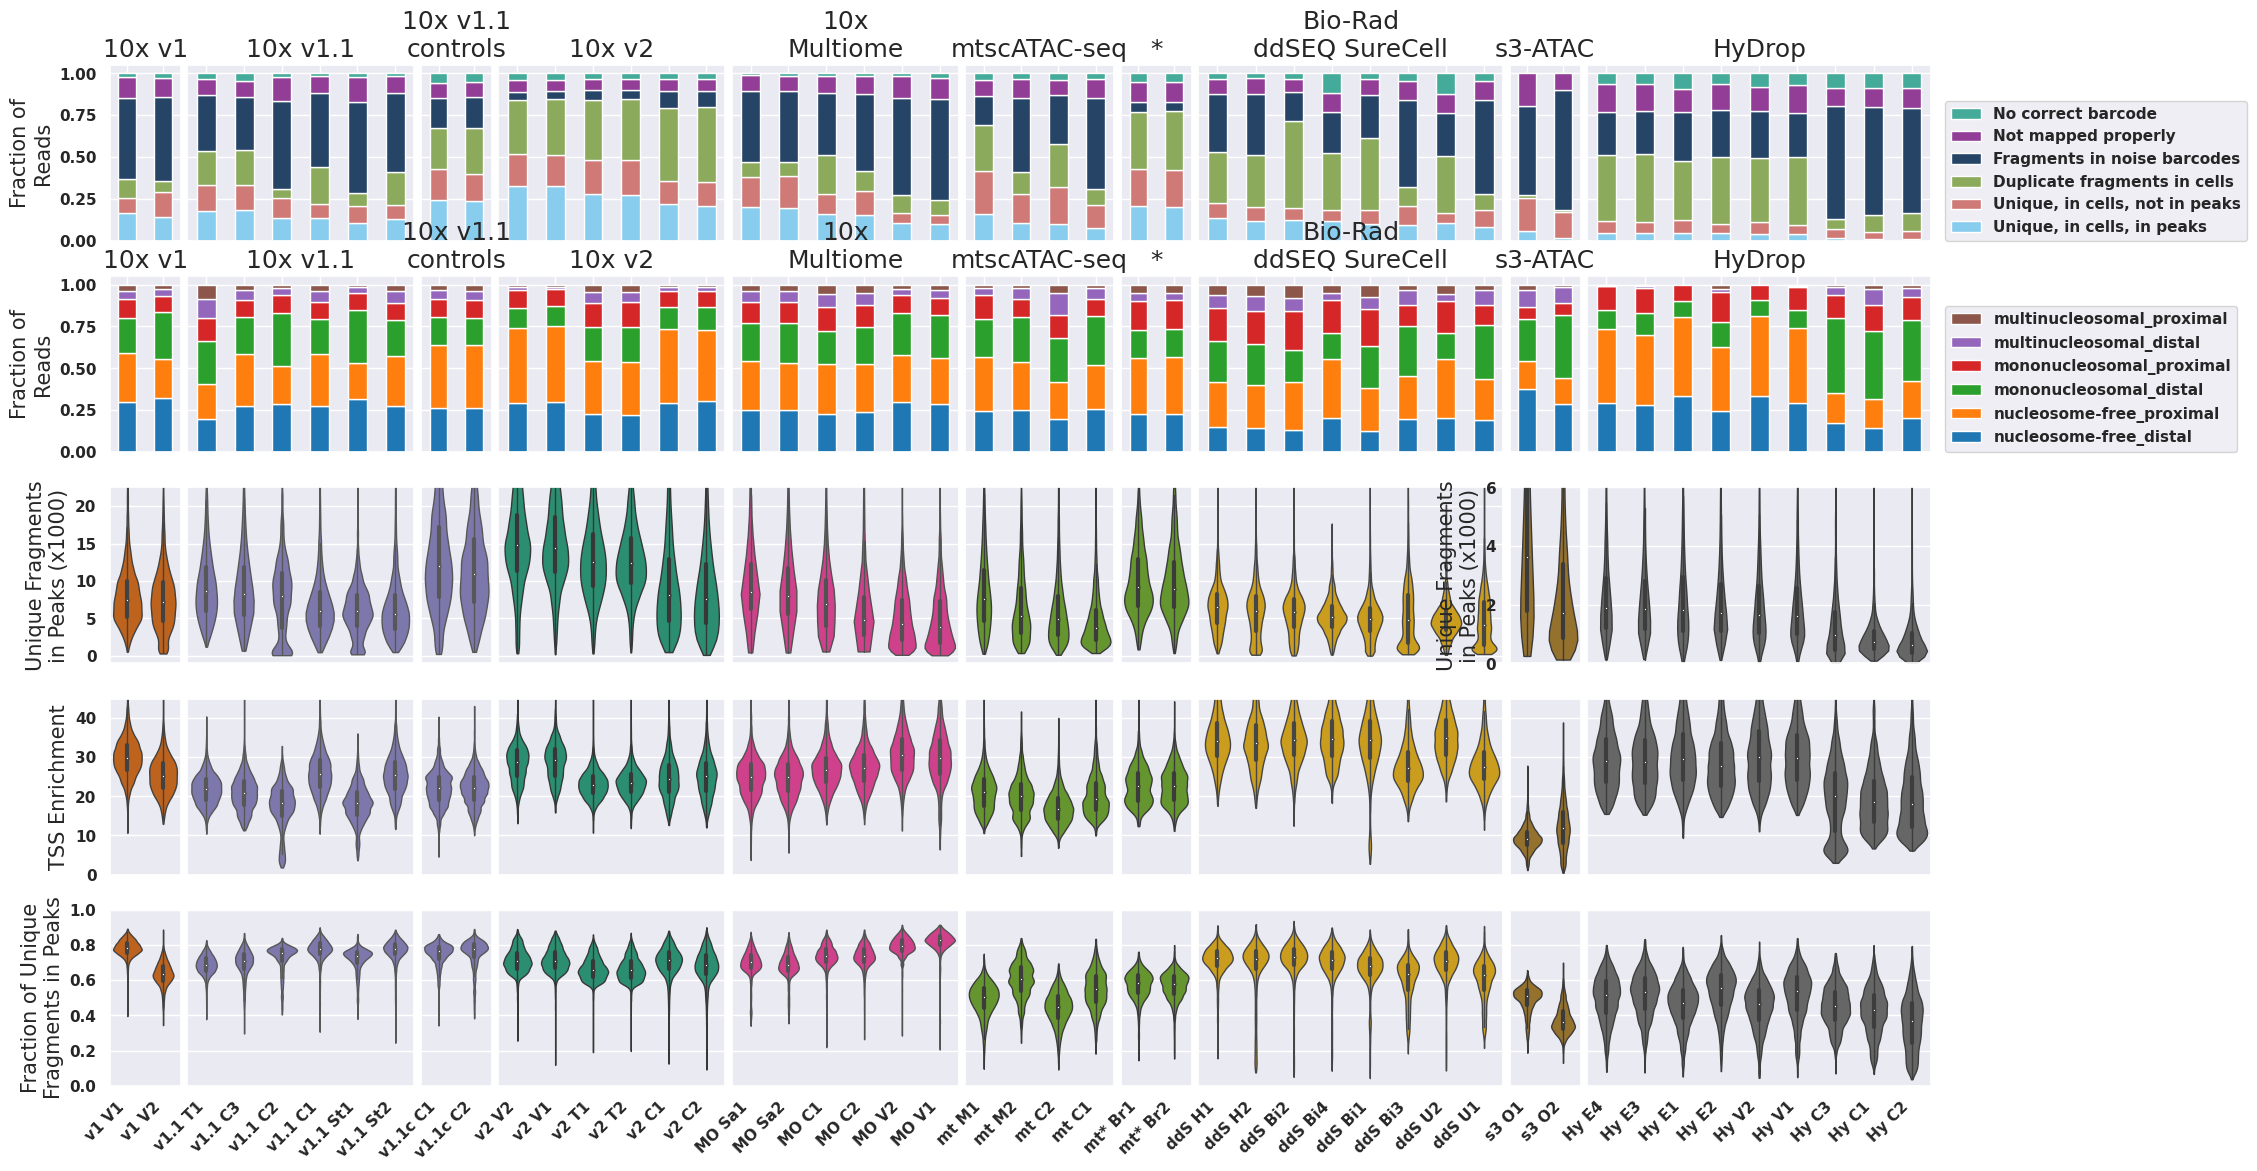

In [161]:
variables_list = ["Unique_nr_frag_in_regions_k", "TSS_enrichment", "FRIP"]
variables_list2 = [
    "seurat_cell_type_pred_score",
    # "Doublet_scores_fragments",
]
n_addendum_cols = 0
n_samples = len(metadata_bc_df_filtered_merged["sample_id"].unique())
n_var = len(variables_list) + len(variables_list2)

n_not_in_variables = 2

# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(
        individual_barplot_width * (n_samples + n_addendum_cols),
        individual_plot_row_height * n_var,
    ),
)

gs = GridSpec(
    len(variables_list) + len(variables_list2) + n_not_in_variables,
    n_samples + n_addendum_cols,
    figure=fig,
)


## draw losses at the top

cell_type_df_normalized["tech"] = [
    x.split("_")[1] for x in cell_type_df_normalized.index
]
losses_df_normalized["sample_id"] = losses_df_normalized.index
losses_df_normalized["tech"] = [x.split("_")[1] for x in losses_df_normalized.index]
grid_start = 0
for tech in tech_order:
    df_tmp = losses_df_normalized[losses_df_normalized["tech"] == tech]
    df_tmp = df_tmp.reindex(order_dict[tech], fill_value=0)
    df_tmp = df_tmp[order]
    df_tmp = df_tmp.loc[order_dict[tech]]

    n_samples_in_tech = len(df_tmp)
    grid_end = grid_start + n_samples_in_tech
    ax = fig.add_subplot(gs[0, grid_start:grid_end])

    df_tmp.plot.bar(
        stacked=True, ax=ax, colormap=cell_type_colors, width=individual_barplot_width
    )

    # .set_ylim(ylim_dict[variable])
    ax.get_legend().remove()

    # only set title on top row
    ax.set_title(tech_alias_dict[tech], fontsize=18)
    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel("Fraction of\nReads", fontsize=15)
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end


handles, labels = plt.gca().get_legend_handles_labels()
order_index = [5, 4, 3, 2, 1, 0]
plt.legend(
    [handles[idx] for idx in order_index],
    [labels[idx] for idx in order_index],
    loc=(1.04, 0),
)

grid_start = 0
for tech in tech_order:
    df_tmp = frag_quantile_df[frag_quantile_df["tech"] == tech]
    df_tmp = df_tmp.reindex(order_dict[tech], fill_value=0)
    df_tmp = df_tmp[frag_order]
    df_tmp = df_tmp.loc[order_dict[tech]]

    n_samples_in_tech = len(df_tmp)
    grid_end = grid_start + n_samples_in_tech
    ax = fig.add_subplot(gs[1, grid_start:grid_end])

    df_tmp.plot.bar(stacked=True, ax=ax, width=individual_barplot_width)

    # .set_ylim(ylim_dict[variable])
    ax.get_legend().remove()

    # only set title on top row
    ax.set_title(tech_alias_dict[tech], fontsize=18)
    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel("Fraction of\nReads", fontsize=15)
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end

handles, labels = plt.gca().get_legend_handles_labels()
order_index = [5, 4, 3, 2, 1, 0]
plt.legend(
    [handles[idx] for idx in order_index],
    [labels[idx] for idx in order_index],
    loc=(1.04, 0),
)

## draw variables_list
grid_start = 0
for tech in tech_order:
    # subset df to tech
    df_tmp = metadata_bc_df_filtered_merged[
        metadata_bc_df_filtered_merged["tech"] == tech
    ]

    # set quick palette
    color = tech_color_palette[tech]
    palette_tmp = {
        x: color for x in metadata_bc_df_filtered_merged["sample_id"].unique()
    }

    n_samples_in_tech = len(df_tmp["sample_id"].unique())
    grid_end = grid_start + n_samples_in_tech
    for variable in variables_list:
        # now determine correct location on gridspec
        ax = fig.add_subplot(
            gs[variables_list.index(variable) + 2, grid_start:grid_end]
        )

        sns.violinplot(
            data=df_tmp,
            x="sample_id",
            y=variable,
            # hue="sample_id",
            order=order_dict[tech],
            palette=palette_tmp,
            ax=ax,
            showfliers=False,
            cut=0,
            bw=0.15,
            inner="box",
            linewidth=1,
        )

        if not variable == "Unique_nr_frag_in_regions_k":
            ax.set_ylim(ylim_dict[variable])
        else:
            if tech == "s3atac" or tech == "hydrop":
                ax.set_ylim([0, 6])
            else:
                ax.set_ylim(ylim_dict[variable])

        # ax.get_legend().remove()

        # only set y label on left col or s3-atac
        if tech == tech_order[0] or (
            tech == "s3atac" and variable == "Unique_nr_frag_in_regions_k"
        ):
            ax.set_ylabel(var_alias_dict[variable], fontsize=15)
        else:
            ax.set_ylabel(None)
            ax.set_yticklabels([])

        ax.set(xlabel="")
        ax.set_xticklabels([])

        ax.set(xlabel="")
        if variable == variables_list[-1]:
            ax.set_xticklabels(
                labels=order_dict_tech_ultrashort[tech], rotation=45, ha="right"
            )
        else:
            ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end

# plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(f"plts_scrap/fixedcells__boxplots_cellvars.png", dpi=600, facecolor="white")
plt.savefig(f"plts_scrap/fixedcells__boxplots_cellvars.svg", dpi=600, facecolor="white")

plt.savefig(
    f"plts_scrap/fixedcells__boxplots_cellvars_small.png", dpi=300, facecolor="white"
)
plt.savefig(
    f"plts_scrap/fixedcells__boxplots_cellvars_small.svg", dpi=300, facecolor="white"
)
plt.show()
plt.close()

# cell type vars

In [82]:
df_stats = pd.read_csv("fixedcells_general_statistics.tsv", sep="\t", index_col=0)

In [83]:
df_peaks = df_stats[
    [
        "n_peaks__CytotoxicTcell",
        "n_peaks__CD4_Tcell",
        "n_peaks__CD14_monocyte",
        "n_peaks__Bcell",
        "n_peaks__Naturalkillercell",
        "n_peaks__CD16_monocyte",
        "n_peaks__Dendriticcell",
    ]
]
df_peaks["tech"] = [x.split("_")[1] for x in df_peaks.index]
if not "BIO_ddseq_1.FIXEDCELLS" in list(df_peaks.index):
    df_peaks.index = [x + ".FIXEDCELLS" for x in df_peaks.index]

/tmp/ipykernel_2363177/167522583.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks["tech"] = [x.split("_")[1] for x in df_peaks.index]


In [84]:
df_dars = df_stats[
    [
        "n_dars__Cytotoxic_T_cell",
        "n_dars__CD4+_T_cell",
        "n_dars__CD14+_monocyte",
        "n_dars__B_cell",
        "n_dars__Natural_killer_cell",
        "n_dars__CD16+_monocyte",
        "n_dars__Dendritic_cell",
    ]
]
df_dars = df_dars / 1000
df_dars["tech"] = [x.split("_")[1] for x in df_dars.index]
if not "BIO_ddseq_1.FIXEDCELLS" in list(df_dars.index):
    df_dars.index = [x + ".FIXEDCELLS" for x in df_dars.index]

In [85]:
# order = [
#     "n_peaks__Bcell",
#     "n_peaks__CD14_monocyte",
#     "n_peaks__CD4_Tcell",
#     "n_peaks__CytotoxicTcell",
#     "n_peaks__Dendriticcell",
#     "n_peaks__Naturalkillercell",
#     "n_peaks__CD16_monocyte",
# ]

order = [
    "n_dars__Cytotoxic_T_cell",
    "n_dars__CD4+_T_cell",
    "n_dars__CD14+_monocyte",
    "n_dars__B_cell",
    "n_dars__Natural_killer_cell",
    "n_dars__CD16+_monocyte",
    "n_dars__Dendritic_cell",
]

In [86]:
dar_labels_dict = {
    "n_dars__Cytotoxic_T_cell": "Cytotoxic T cell DARs",
    "n_dars__CD4+_T_cell": "Naive T cell DARs",
    "n_dars__CD14+_monocyte": "CD14+ monocyte DARs",
    "n_dars__B_cell": "B cell DARs",
    "n_dars__Natural_killer_cell": "Natural killer cell DARs",
    "n_dars__CD16+_monocyte": "CD16+ monocyte DARs",
    "n_dars__Dendritic_cell": "Dendritic cell DARs",
}

In [87]:
dar_path_dict = {
    x.split("/")[-1]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*DARs.bed"
        )
    )
}

In [88]:
top_n_dars = 2000

df_regions_merged = pd.DataFrame()
for sample, dar_path in dar_path_dict.items():
    supersample = sample.split(".")[0]
    cell_type = sample.split("__")[1].split("__")[0]
    df_regions = pd.read_csv(dar_path, sep="\t", header=None).sort_values(
        4, ascending=False
    )
    df_regions = df_regions[0:top_n_dars]
    df_regions["cell_type"] = cell_type
    df_regions["sample_id"] = supersample

    df_regions_merged = pd.concat([df_regions_merged, df_regions])

In [89]:
if not "BIO_ddseq_1.FIXEDCELLS" in list(df_regions_merged["sample_id"]):
    df_regions_merged["sample_id"] = df_regions_merged["sample_id"] + ".FIXEDCELLS"

df_regions_merged["sample_id"] = [
    x.replace("CNA_10xv11_4.FIXEDCELLS", "CNA_10xv11c_1.FIXEDCELLS").replace(
        "CNA_10xv11_5.FIXEDCELLS", "CNA_10xv11c_2.FIXEDCELLS"
    )
    for x in df_regions_merged["sample_id"]
]
df_regions_merged["sample_id"] = [
    x.replace("BRO_mtscatac_1.FIXEDCELLS", "BRO_mtscatacfacs_1.FIXEDCELLS").replace(
        "BRO_mtscatac_2.FIXEDCELLS", "BRO_mtscatacfacs_2.FIXEDCELLS"
    )
    for x in df_regions_merged["sample_id"]
]
df_regions_merged["tech"] = [x.split("_")[1] for x in df_regions_merged["sample_id"]]

In [90]:
df_regions_merged.columns = [
    "chr",
    "start",
    "end",
    "cell_type1",
    "logFC",
    "strand",
    "p_val",
    "cell_type",
    "sample_id",
    "tech",
]

In [91]:
df_regions_merged_medians = (
    df_regions_merged.groupby(["cell_type", "sample_id"])["logFC"]
    .median()
    .reset_index()
)

In [92]:
df_regions_merged_medians["tech"] = [
    x.split("_")[1] for x in df_regions_merged_medians["sample_id"]
]

In [93]:
cell_type_color_dict = {
    "Dendritic_cell": "#44AA99",
    "CD16+_monocyte": "#AA4499",
    "Natural_killer_cell": "#332288",
    "B_cell": "#117733",
    "CD14+_monocyte": "#DDCC77",
    "CD4+_T_cell": "#CC6677",
    "Cytotoxic_T_cell": "#88CCEE",
}

In [94]:
sns.color_palette(cell_type_color_dict.values())

[(0.26666666666666666, 0.6666666666666666, 0.6),
 (0.6666666666666666, 0.26666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.06666666666666667, 0.4666666666666667, 0.2),
 (0.8666666666666667, 0.8, 0.4666666666666667),
 (0.8, 0.4, 0.4666666666666667),
 (0.5333333333333333, 0.8, 0.9333333333333333)]

In [95]:
ylim_dict["logFC"] = [0.2, 8.5]

In [96]:
individual_plot_row_height = 3

In [97]:
individual_barplot_width

0.5

In [98]:
df_regions_merged_medians["FC"] = 2 ** df_regions_merged_medians["logFC"]

In [118]:
ylim_dict["FC"] = [1.5, 128]

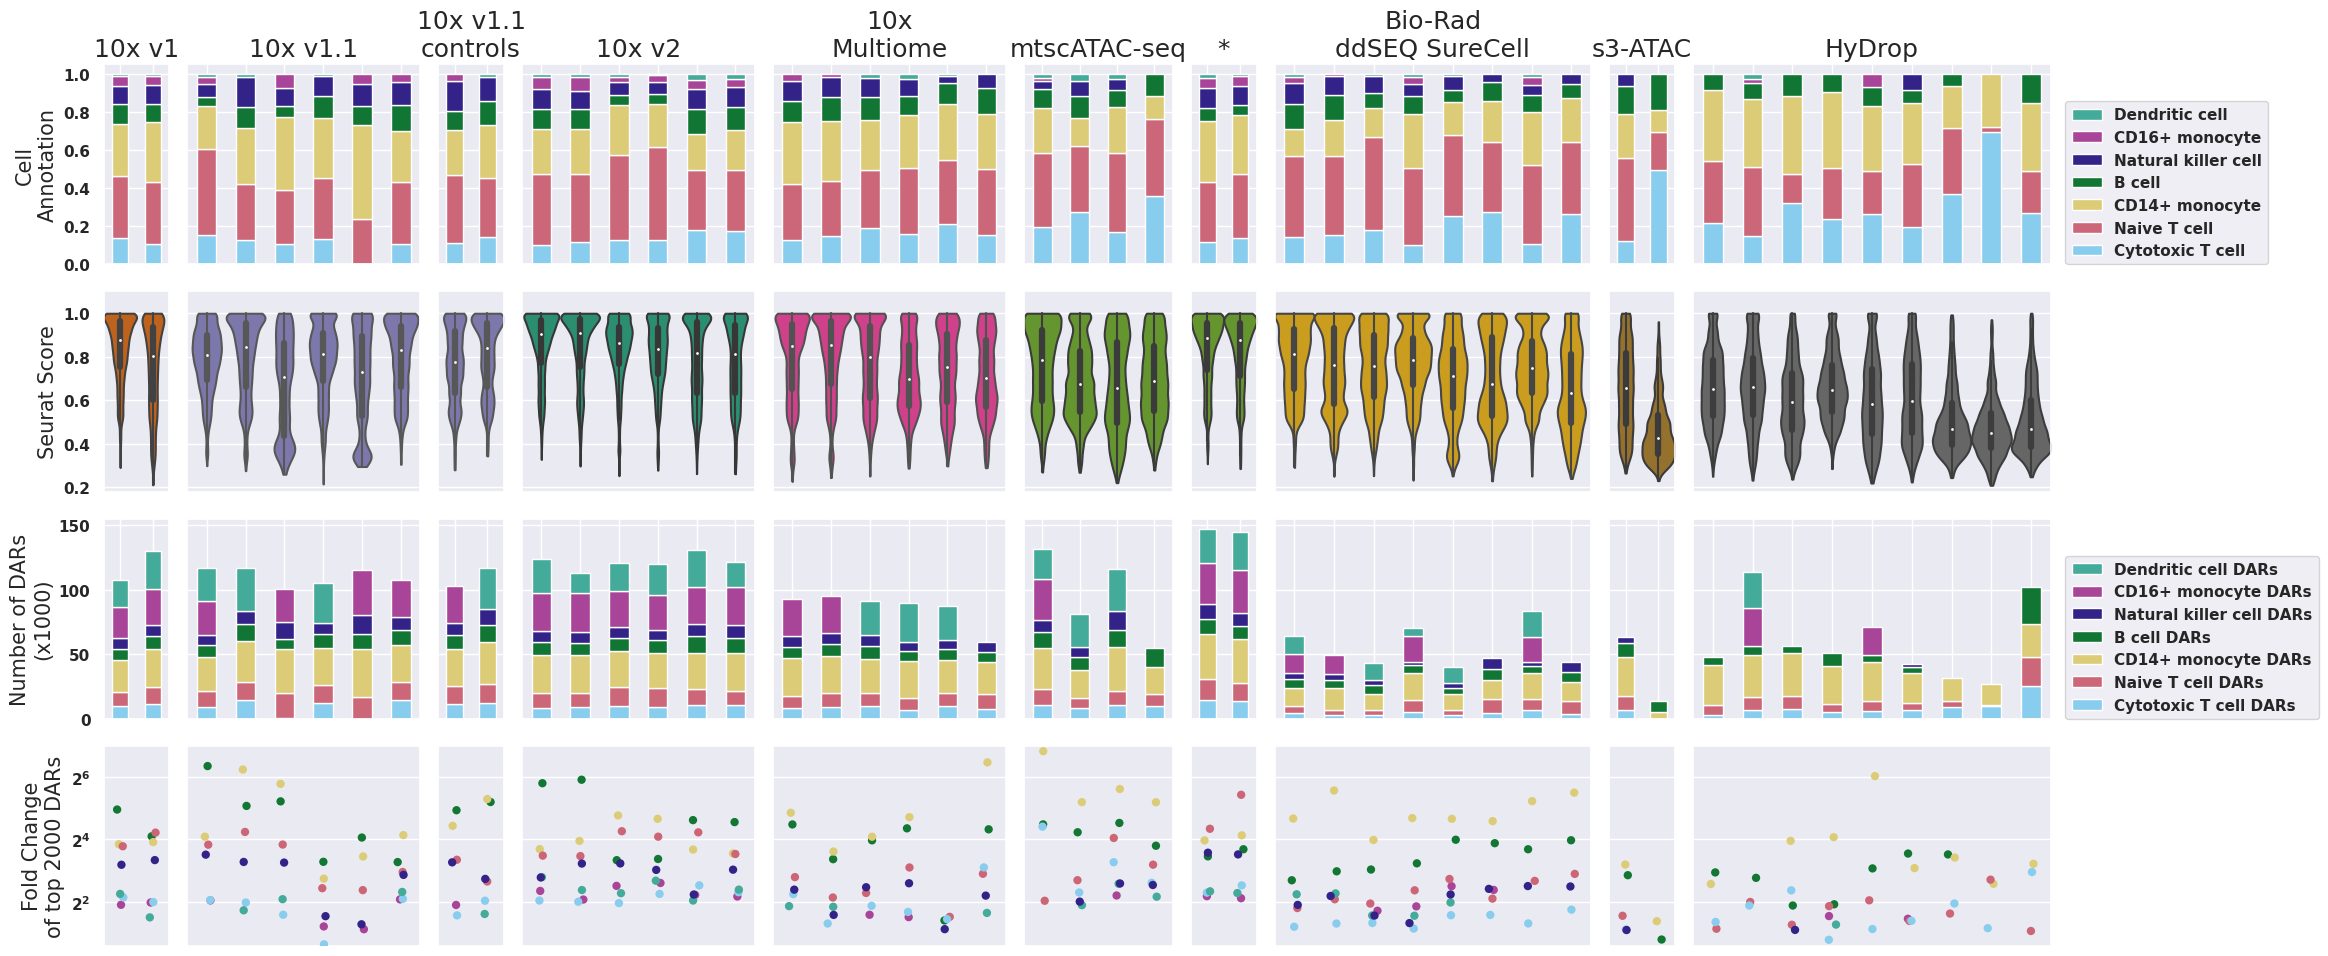

In [120]:
variables_list = ["Unique_nr_frag_in_regions", "TSS_enrichment", "FRIP"]
variables_list2 = [
    "seurat_cell_type_pred_score",
    # "Doublet_scores_fragments",
]
n_addendum_cols = 0
n_samples = len(metadata_bc_df_filtered_merged["sample_id"].unique())
n_var = len(variables_list) + len(variables_list2)
cell_type_df_normalized["tech"] = [
    x.split("_")[1] for x in cell_type_df_normalized.index
]

n_not_in_variables = 1

# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(
        individual_barplot_width * (n_samples + n_addendum_cols),
        individual_plot_row_height * n_var,
    ),
)

gs = GridSpec(
    len(variables_list) + len(variables_list2) + n_not_in_variables,
    n_samples + n_addendum_cols,
    figure=fig,
)

grid_start = 0
for tech in tech_order:
    #### first draw the stacked barplot
    # subset df to tech
    df_tmp = cell_type_df_normalized[cell_type_df_normalized["tech"] == tech]
    df_tmp = df_tmp.loc[order_dict[tech]]
    # set quick palette
    # color = tech_color_palette[tech]
    # palette_tmp = {x: color for x in cell_data_df_merged["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp)
    grid_end = grid_start + n_samples_in_tech
    ax = fig.add_subplot(gs[0, grid_start:grid_end])

    df_tmp.plot.bar(
        stacked=True, ax=ax, colormap=cell_type_colors, width=individual_barplot_width
    )

    # .set_ylim(ylim_dict[variable])

    # only set title on top row
    ax.set_title(tech_alias_dict[tech], fontsize=18)

    # only set legend on most right col
    if tech == tech_order[-1]:
        handles, labels = plt.gca().get_legend_handles_labels()
        order_index = list(range(len(handles)))[::-1]
        plt.legend(
            [handles[idx] for idx in order_index],
            [labels[idx] for idx in order_index],
            loc=(1.04, 0),
        )
    else:
        ax.get_legend().remove()

    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel("Cell\nAnnotation", fontsize=15)
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])

    ####
    # plot variables
    ####

    # subset df to tech
    df_tmp = cell_data_df_merged[cell_data_df_merged["tech"] == tech]

    # set quick palette
    color = tech_color_palette[tech]
    palette_tmp = {x: color for x in cell_data_df_merged["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp["sample_id"].unique())
    grid_end = grid_start + n_samples_in_tech

    for variable in variables_list2:
        # now determine correct location on gridspec
        ax = fig.add_subplot(
            gs[
                variables_list2.index(variable) + n_not_in_variables,
                grid_start:grid_end,
            ]
        )

        # sns.boxplot(
        #     data=df_tmp,
        #     x="sample_id",
        #     y=variable,
        #     # hue="cell_type",
        #     order=order_dict[tech],
        #     # hue_order=order_dict[tech],
        #     palette=palette_tmp,
        #     width=0.8,
        #     ax=ax,
        #     showfliers=False,
        # )
        sns.violinplot(
            data=df_tmp,
            x="sample_id",
            y=variable,
            # hue="cell_type",
            order=order_dict[tech],
            # hue_order=order_dict[tech],
            palette=palette_tmp,
            width=1,
            ax=ax,
            cut=0,
            bw=0.15,
        )
        ax.set_ylim(ylim_dict[variable])
        # ax.get_legend().remove()

        # only set y label on left col
        if tech == tech_order[0]:
            ax.set_ylabel(var_alias_dict[variable], fontsize=15)
        else:
            ax.set_ylabel(None)
            ax.set_yticklabels([])

        # remove xlabel
        ax.set_xticklabels([])
        ax.set(xlabel="")

    ##########
    # draw n DARS
    ##########

    df_tmp = df_dars[df_dars["tech"] == tech]
    df_tmp = df_tmp.reindex(order_dict[tech], fill_value=0)
    df_tmp = df_tmp[order]
    df_tmp = df_tmp.loc[order_dict[tech]]

    n_samples_in_tech = len(df_tmp)
    grid_end = grid_start + n_samples_in_tech
    ax = fig.add_subplot(
        gs[len(variables_list2) + n_not_in_variables, grid_start:grid_end]
    )

    df_tmp.plot.bar(
        stacked=True,
        ax=ax,
        colormap=cell_type_colors,
        width=individual_barplot_width,
    )
    ax.set_ylim([0, 155])

    ax.get_legend().remove()

    # only set y label on left col
    if tech == tech_order[0]:
        ax.set_ylabel("Number of DARs\n(x1000)", fontsize=15)
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.set(xlabel="")
    ax.set_xticklabels([])
    ax.set_title("")

    # start coordinate of next tech is end coordinate of previous tech
    # only set legend on most right col
    if tech == tech_order[-1]:
        handles, labels = plt.gca().get_legend_handles_labels()
        order_index = list(range(len(handles)))[::-1]
        plt.legend(
            [handles[idx] for idx in order_index],
            [dar_labels_dict[labels[idx]] for idx in order_index],
            loc=(1.04, 0),
        )

    #####
    # DAR strengths
    #####

    # subset df to tech
    df_tmp = df_regions_merged_medians[df_regions_merged_medians["tech"] == tech]

    # set quick palette
    color = tech_color_palette[tech]
    palette_tmp = {x: color for x in df_tmp["sample_id"].unique()}

    n_samples_in_tech = len(df_tmp["sample_id"].unique())
    grid_end = grid_start + n_samples_in_tech

    for variable in ["FC"]:
        # now determine correct location on gridspec
        ax = fig.add_subplot(
            gs[
                3,
                grid_start:grid_end,
            ]
        )

        sns.stripplot(
            data=df_tmp,
            x="sample_id",
            y=variable,
            hue="cell_type",
            jitter=True,
            s=6,
            linewidth=0,
            palette=cell_type_color_dict,
            ax=ax,
        )

        # sns.boxplot(
        #     data=df_tmp,
        #     x="sample_id",
        #     y=variable,
        #     hue="cell_type",
        #     order=order_dict[tech],
        #     # hue_order=order_dict[tech],
        #     # palette=palette_tmp,
        #     width=0.8,
        #     ax=ax,
        #     showfliers=False,
        # )

        ax.set_ylim(ylim_dict[variable])
        ax.get_legend().remove()
        ax.set_yscale("log", base=2)

        # only set y label on left col
        if tech == tech_order[0]:
            ax.set_ylabel("Fold Change\nof top 2000 DARs", fontsize=15)
        else:
            ax.set_ylabel(None)
            ax.set_yticklabels([])

        # remove xlabel
        ax.set_xticklabels([])

    # xlabel here
    ax.set(xlabel="")
    if variable == variables_list2[-1]:
        ax.set_xticklabels(
            labels=order_dict_tech_ultrashort[tech], rotation=45, ha="right"
        )
    else:
        ax.set_xticklabels([])

    grid_start = grid_end

# plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(
    f"plts_scrap/fixedcells__boxplots_celltypevars.png",
    dpi=600,
    facecolor="white",
)
plt.savefig(
    f"plts_scrap/fixedcells__boxplots_celltypevars.svg",
    dpi=600,
    facecolor="white",
)

plt.savefig(
    f"plts_scrap/fixedcells__boxplots_celltypevars_small.png",
    dpi=300,
    facecolor="white",
)
plt.savefig(
    f"plts_scrap/fixedcells__boxplots_celltypevars_small.svg",
    dpi=300,
    facecolor="white",
)
plt.show()
plt.close()

In [101]:
for cell_type in [
    "n_dars__Cytotoxic_T_cell",
    "n_dars__CD4+_T_cell",
    "n_dars__CD14+_monocyte",
    "n_dars__B_cell",
    "n_dars__Natural_killer_cell",
    "n_dars__CD16+_monocyte",
    "n_dars__Dendritic_cell",
]:
    print(cell_type)
    df_dars.groupby("tech").median()

n_dars__Cytotoxic_T_cell
n_dars__CD4+_T_cell
n_dars__CD14+_monocyte
n_dars__B_cell
n_dars__Natural_killer_cell
n_dars__CD16+_monocyte
n_dars__Dendritic_cell


In [ ]:
df_dars.groupby("tech").median()

,n_dars__Cytotoxic_T_cell,n_dars__CD4+_T_cell,n_dars__CD14+_monocyte,n_dars__B_cell,n_dars__Natural_killer_cell,n_dars__CD16+_monocyte,n_dars__Dendritic_cell
tech,,,,,,,
10xmultiome,8.7005,10.1235,27.2790,8.9965,7.9820,28.5070,26.793
10xv1,10.5600,12.4295,26.6120,9.4955,8.4540,26.0395,25.008
10xv11,12.1330,14.3575,30.2105,11.2500,10.3975,27.3620,31.150
10xv11c,11.9395,14.3010,30.7260,12.0185,10.5655,28.7070,32.320
10xv2,9.4085,12.0055,28.7555,10.0905,8.5885,28.8760,22.921
ddseq,4.3540,6.7895,14.7860,6.4150,4.4295,17.3030,12.880
hydrop,7.1320,7.6990,29.1870,6.3670,2.8920,25.4095,27.322
mtscatac,10.3155,9.9360,26.6425,13.1330,9.3170,31.2230,25.724
mtscatacfacs,14.3120,14.7155,34.9585,10.8970,10.5125,32.8400,27.557


In [103]:
for cell_type in df_regions_merged_medians["cell_type"].unique():
    df_tmp = df_regions_merged_medians[
        df_regions_merged_medians["cell_type"] == cell_type
    ]
    print(cell_type)
    print(df_tmp.groupby("tech").median())

B_cell
                 logFC         FC
tech                             
10xmultiome   4.148023  17.861432
10xv1         4.528985  24.115310
10xv11        4.567668  25.192511
10xv11c       5.067743  33.678152
10xv2         4.587252  24.043873
ddseq         3.459763  11.137748
hydrop        2.943144   7.690853
mtscatac      4.356332  20.560923
mtscatacfacs  3.571233  11.923488
s3atac        1.822969   4.479852
CD14+_monocyte
                 logFC         FC
tech                             
10xmultiome   4.785030  27.602598
10xv1         3.880610  14.733206
10xv11        4.114195  17.320506
10xv11c       4.864324  30.426475
10xv2         3.821013  14.191980
ddseq         4.676711  25.576213
hydrop        3.419687  10.701097
mtscatac      5.405231  42.831751
mtscatacfacs  4.050515  16.596049
s3atac        2.287631   5.882499
CD16+_monocyte
                 logFC        FC
tech                            
10xmultiome   1.548363  2.925856
10xv1         1.942120  3.843975
10xv11        1

/tmp/ipykernel_2363177/3964365300.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_tmp.groupby("tech").median())
/tmp/ipykernel_2363177/3964365300.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_tmp.groupby("tech").median())
/tmp/ipykernel_2363177/3964365300.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_tmp.groupby("tech").median())
/tmp/ipykernel_2363177/3964365300.py:6: 

In [104]:
df_regions_merged_medians

,cell_type,sample_id,logFC,tech,FC
0,B_cell,BIO_ddseq_1.FIXEDCELLS,2.691359,ddseq,6.459216
1,B_cell,BIO_ddseq_2.FIXEDCELLS,2.978202,ddseq,7.880035
2,B_cell,BIO_ddseq_3.FIXEDCELLS,3.035240,ddseq,8.197817
3,B_cell,BIO_ddseq_4.FIXEDCELLS,3.233812,ddseq,9.407504
4,B_cell,BRO_mtscatacfacs_1.FIXEDCELLS,3.457201,mtscatacfacs,10.983006
...,...,...,...,...,...
265,Natural_killer_cell,VIB_10xmultiome_2.FIXEDCELLS,2.199750,10xmultiome,4.593996
266,Natural_killer_cell,VIB_10xv1_1.FIXEDCELLS,3.188068,10xv1,9.113899
267,Natural_killer_cell,VIB_10xv1_2.FIXEDCELLS,3.338289,10xv1,10.114048
268,Natural_killer_cell,VIB_10xv2_1.FIXEDCELLS,2.234137,10xv2,4.704813
